### Sentiment Analysis

Rule-based S.A & Embedding based models for S.A.:
- **rule-based:**
    1. VADER -> optimized for social mefia
    2. TEXTBLOB
- **embedding based model:**
    1. FLAIR -> The drawback of using a flair pre-trained model for sentiment analysis is that it is trained on IMDB data and this model might not generalize well on data from other domains like twitter.
    
    
Steps:
1. Preprocess data -> tokenization - lemmatization - stopwords removal
2. Feature Extraction -> TF-IDF and BoW
3. Calculate Polarity and Subjectivity + Sentiment after TF-IDF or BoW to be more representative

If not available, install it

In [1]:
# Run data_quality_stats script to load some functions imported below
# ! pip install wordclouds
# ! pip install nltk
# ! pip install seaborn
# ! pip install vaderSentiment
# ! pip install xlrd
# ! pip install python-dateutil
# ! pip install langdetect
# ! pip install unidecode
# ! pip install flair

**Import the well-known libraries**

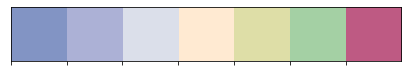

In [2]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline 
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

# Color palette
my_colors = ["#8294C4", "#ACB1D6", "#DBDFEA", "#FFEAD2", "#DEDEA7", '#A4D0A4', '#BE5A83']
sns.palplot(sns.color_palette(my_colors))

# Set Style
sns.set_style("white")
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

class color:
    BOLD = '\033[1m' + '\033[93m'
    END = '\033[0m'
    
import warnings
warnings.simplefilter("ignore")

**Import libraries for NLP & Sentiment Analysis's tasks**

In [3]:
# Stopwords, tokeninzer, stemmer, lemmatizer
import nltk
from nltk.tokenize import word_tokenize, TweetTokenizer
from nltk import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
from nltk import bigrams
from nltk import FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.sparse import hstack
from sklearn.linear_model import LogisticRegression


from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.decomposition import LatentDirichletAllocation

from collections import Counter
from textblob import TextBlob

import re
import string

import gensim
from gensim.parsing.preprocessing import remove_stopwords # we also use gensim for stopwords removal

import flair
from flair.models import TextClassifier
from flair.data import Sentence
from segtok.segmenter import split_single

classifier = TextClassifier.load('en-sentiment')

# Import utility scripts
from ipynb.fs.full.data_quality_stats import missing_data, unique_values, most_frequent_values
from ipynb.fs.full.data_quality_stats import plot_count
from ipynb.fs.full.data_quality_stats import offset_png, show_values_on_bars, emoji_extractor, clean_emoji, clean_tweets 

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/roxanel/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/roxanel/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/roxanel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/roxanel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Read data**

In [4]:
df = pd.read_csv('Elon Musk tweets all.csv')
df.head()
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head(2)

,id,conversation_id,created_at,date,user_id,username,name,tweet,replies_count,retweets_count,likes_count,is_retweet,user_followers,user_friends,user_favourites
0,1.543473e+10,1.543473e+10,2010-06-04 21:31:57,2010-06-04,44196397,elonmusk,Elon Musk,"Please ignore prior tweets, as that was someon...",398.0,349,4710,False,NaN,NaN,NaN
1,1.421799e+17,1.421799e+17,2011-12-01 11:55:11,2011-12-01,44196397,elonmusk,Elon Musk,Went to Iceland on Sat to ride bumper cars on ...,31.0,16,191,False,NaN,NaN,NaN


In [5]:
df_1 = pd.read_csv('Elon Musk tweets cleaned.csv')
df_1.head()
df_1.drop('Unnamed: 0', axis=1, inplace=True)
df_1.head(2)

,id,conversation_id,created_at,date,user_id,username,name,tweet,replies_count,retweets_count,likes_count,is_retweet,user_followers,user_friends,user_favourites,tweet_emojis
0,1.543473e+10,1.543473e+10,2010-06-04 21:31:57,2010-06-04,44196397,elonmusk,Elon Musk,please ignore prior tweets as that was someone...,398.0,349,4710,False,NaN,NaN,NaN,[]
1,1.421799e+17,1.421799e+17,2011-12-01 11:55:11,2011-12-01,44196397,elonmusk,Elon Musk,went to iceland on sat to ride bumper cars on ...,31.0,16,191,False,NaN,NaN,NaN,[]


In [6]:
df_1 = df_1.rename(columns={'tweet':'tweet_clean_func', 'created_at':'created_at_df1'})
# df_1

In [7]:
df_1['tweet_emojis'].value_counts()

[]              20359
['🤣🤣']            269
['🤣']             218
['💯']              53
['😀']              39
                ...  
['🦌']               1
['🎤']               1
['🚀🚘', '🧠🕳']        1
['💨', '🐐']          1
['🙌']               1
Name: tweet_emojis, Length: 440, dtype: int64

In [8]:
df_2 = df_1[['tweet_emojis', 'tweet_clean_func', 'created_at_df1']]

In [9]:
df_2

,tweet_emojis,tweet_clean_func,created_at_df1
0,[],please ignore prior tweets as that was someone...,2010-06-04 21:31:57
1,[],went to iceland on sat to ride bumper cars on ...,2011-12-01 11:55:11
2,[],i made the volume on the model s go to 11 now ...,2011-12-01 12:29:04
3,[],great voltaire quote arguably better than twai...,2011-12-03 10:20:28
4,[],that was a total non sequitur btw,2011-12-03 10:22:07
...,...,...,...
21925,[],it’s almost like there’s a pattern,2023-05-04 02:26:08
21926,[],interesting,2023-05-04 01:20:39
21927,[],14 years ago,2023-05-03 22:38:24
21928,[],always tough with margins for new vehicle line...,2023-05-03 19:43:13


In [10]:
df_3 = pd.concat([df, df_2], axis = 1)
df_3.head(2)
df_3.shape

(21930, 18)

In [11]:
columns_to_drop = ['created_at_df1']

In [12]:
df_3.drop(columns_to_drop, axis = 1, inplace=True)

In [13]:
df_analiza = df_3

**Create a copy for df_10_23 named *df_analiza* so that during analysis we don't mess with all data :)**

In [14]:
df_copy = df_analiza.copy()
df_copy

,id,conversation_id,created_at,date,user_id,username,name,tweet,replies_count,retweets_count,likes_count,is_retweet,user_followers,user_friends,user_favourites,tweet_emojis,tweet_clean_func
0,1.543473e+10,1.543473e+10,2010-06-04 21:31:57,2010-06-04,44196397,elonmusk,Elon Musk,"Please ignore prior tweets, as that was someon...",398.0,349,4710,False,NaN,NaN,NaN,[],please ignore prior tweets as that was someone...
1,1.421799e+17,1.421799e+17,2011-12-01 11:55:11,2011-12-01,44196397,elonmusk,Elon Musk,Went to Iceland on Sat to ride bumper cars on ...,31.0,16,191,False,NaN,NaN,NaN,[],went to iceland on sat to ride bumper cars on ...
2,1.421885e+17,1.421885e+17,2011-12-01 12:29:04,2011-12-01,44196397,elonmusk,Elon Musk,I made the volume on the Model S http://t.co/...,31.0,9,79,False,NaN,NaN,NaN,[],i made the volume on the model s go to 11 now ...
3,1.428809e+17,1.428809e+17,2011-12-03 10:20:28,2011-12-03,44196397,elonmusk,Elon Musk,"Great Voltaire quote, arguably better than Twa...",7.0,24,30,False,NaN,NaN,NaN,[],great voltaire quote arguably better than twai...
4,1.428813e+17,1.428813e+17,2011-12-03 10:22:07,2011-12-03,44196397,elonmusk,Elon Musk,That was a total non sequitur btw,29.0,6,52,False,NaN,NaN,NaN,[],that was a total non sequitur btw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21925,1.653949e+18,NaN,2023-05-04 02:26:08,NaN,44196397,elonmusk,Elon Musk,@zerohedge It’s almost like there’s a pattern,NaN,1601,25557,False,139450414.0,294.0,23383.0,[],it’s almost like there’s a pattern
21926,1.653933e+18,NaN,2023-05-04 01:20:39,NaN,44196397,elonmusk,Elon Musk,@RebelNewsOnline Interesting,NaN,1241,9821,False,139450414.0,294.0,23383.0,[],interesting
21927,1.653892e+18,NaN,2023-05-03 22:38:24,NaN,44196397,elonmusk,Elon Musk,@JonErlichman 14 years ago,NaN,780,14869,False,139450414.0,294.0,23383.0,[],14 years ago
21928,1.653848e+18,NaN,2023-05-03 19:43:13,NaN,44196397,elonmusk,Elon Musk,@realMeetKevin @Tesla Always tough with margin...,NaN,965,20502,False,139450414.0,294.0,23383.0,[],always tough with margins for new vehicle line...


In [15]:
df_copy['tweet_emojis'].value_counts()

[]              20359
['🤣🤣']            269
['🤣']             218
['💯']              53
['😀']              39
                ...  
['🦌']               1
['🎤']               1
['🚀🚘', '🧠🕳']        1
['💨', '🐐']          1
['🙌']               1
Name: tweet_emojis, Length: 440, dtype: int64

In [16]:
df_copy['tweet'].loc[0]

'Please ignore prior tweets, as that was someone pretending to be me :)  This is actually me.'

In [17]:
df_copy = df_copy.astype({'id': 'Int64', 'conversation_id': 'Int64', 'user_id':'Int64',
                            'replies_count': 'Int64', 'user_favourites': 'Int64', 'user_followers': 'Int64',
                           'user_friends': 'Int64', 'retweets_count': 'Int64', 'likes_count': 'Int64'})

#### EXPLORATORY DATA ANALYSIS

**Create a rocket-like visualization**

Observation: Keep *date* and *created_at* columns stores as object to draw the graph and after that transform them into datetime objects !!

In [18]:
# Create new features
df_copy["year_object"] = df_copy["created_at"].apply(lambda x: x.split("-")[0])
df_copy

,id,conversation_id,created_at,date,user_id,username,name,tweet,replies_count,retweets_count,likes_count,is_retweet,user_followers,user_friends,user_favourites,tweet_emojis,tweet_clean_func,year_object
0,15434727182,15434727182,2010-06-04 21:31:57,2010-06-04,44196397,elonmusk,Elon Musk,"Please ignore prior tweets, as that was someon...",398,349,4710,False,<NA>,<NA>,<NA>,[],please ignore prior tweets as that was someone...,2010
1,142179928203460608,142179928203460608,2011-12-01 11:55:11,2011-12-01,44196397,elonmusk,Elon Musk,Went to Iceland on Sat to ride bumper cars on ...,31,16,191,False,<NA>,<NA>,<NA>,[],went to iceland on sat to ride bumper cars on ...,2011
2,142188458125963264,142188458125963264,2011-12-01 12:29:04,2011-12-01,44196397,elonmusk,Elon Musk,I made the volume on the Model S http://t.co/...,31,9,79,False,<NA>,<NA>,<NA>,[],i made the volume on the model s go to 11 now ...,2011
3,142880871391838208,142880871391838208,2011-12-03 10:20:28,2011-12-03,44196397,elonmusk,Elon Musk,"Great Voltaire quote, arguably better than Twa...",7,24,30,False,<NA>,<NA>,<NA>,[],great voltaire quote arguably better than twai...,2011
4,142881284019060736,142881284019060736,2011-12-03 10:22:07,2011-12-03,44196397,elonmusk,Elon Musk,That was a total non sequitur btw,29,6,52,False,<NA>,<NA>,<NA>,[],that was a total non sequitur btw,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21925,1653949097970393088,<NA>,2023-05-04 02:26:08,NaN,44196397,elonmusk,Elon Musk,@zerohedge It’s almost like there’s a pattern,<NA>,1601,25557,False,139450414,294,23383,[],it’s almost like there’s a pattern,2023
21926,1653932618357022720,<NA>,2023-05-04 01:20:39,NaN,44196397,elonmusk,Elon Musk,@RebelNewsOnline Interesting,<NA>,1241,9821,False,139450414,294,23383,[],interesting,2023
21927,1653891787025690624,<NA>,2023-05-03 22:38:24,NaN,44196397,elonmusk,Elon Musk,@JonErlichman 14 years ago,<NA>,780,14869,False,139450414,294,23383,[],14 years ago,2023
21928,1653847700780249088,<NA>,2023-05-03 19:43:13,NaN,44196397,elonmusk,Elon Musk,@realMeetKevin @Tesla Always tough with margin...,<NA>,965,20502,False,139450414,294,23383,[],always tough with margins for new vehicle line...,2023


*Yearly Tweets Evolution*

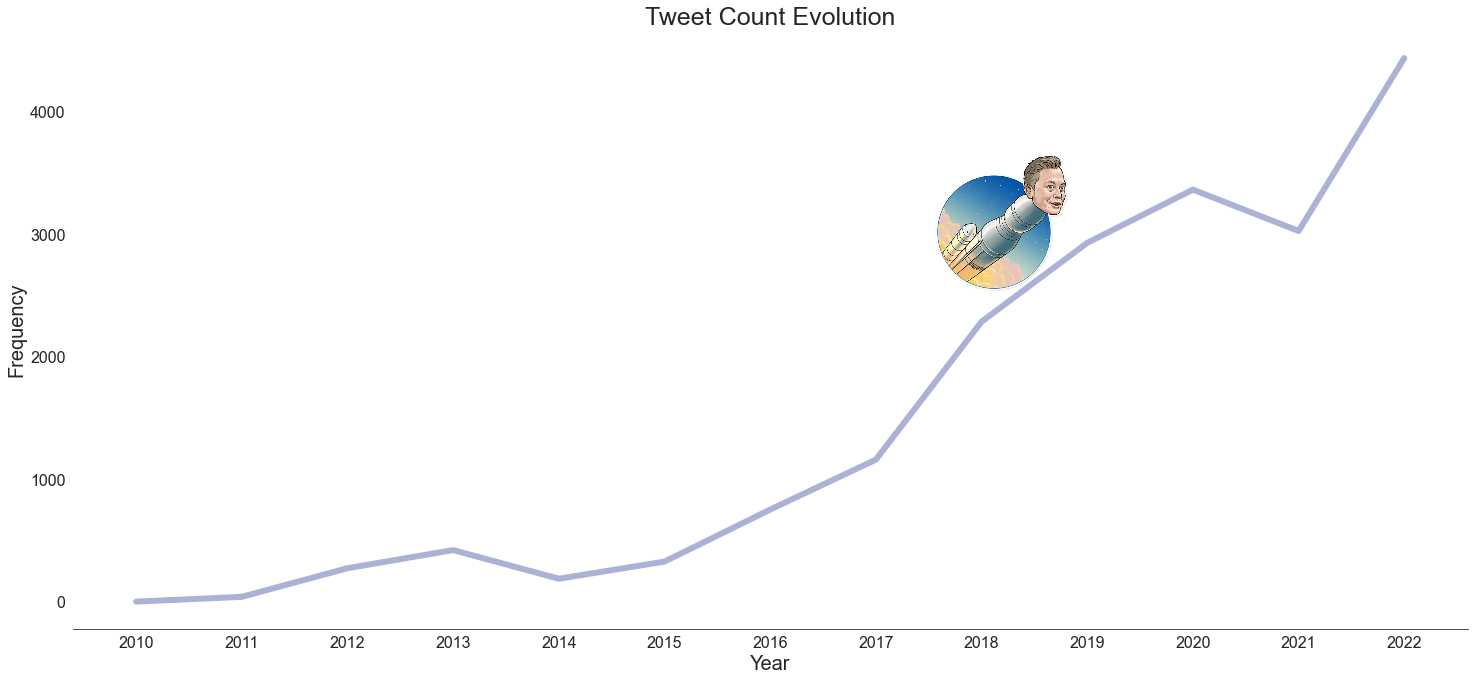

In [19]:
# Yearly evolution
date_count_df = df_copy[df_copy["year_object"]!="2023"].groupby("year_object")["tweet"].count().reset_index()

# Plot
plt.figure(figsize=(25, 11))
ax = sns.lineplot(data=date_count_df, x="year_object", y="tweet", lw=6, color=my_colors[1])
plt.title("Tweet Count Evolution", size=25)
plt.xlabel("Year", size=20)
plt.ylabel("Frequency", size=20)
sns.despine(left=True);

# Picture
path='elon_rocket.png'
offset_png(x=8.2, y=3100, path=path, ax=ax, zoom=0.27, offset=0)

*Yearly Popularity Indicators*

- likes, retweets and replies

In [20]:
# Get Popularity Information
popularity = ["likes_count", "retweets_count", "replies_count"]
popularity_df = df_copy[df_copy["year_object"]!="2023"].groupby("year_object").agg({popularity[0] : 'sum',
                                                                    popularity[1] : 'sum',
                                                                    popularity[2] : 'sum',
                                                                    'tweet' : 'count'}).reset_index()
popularity_df["likes_count"] = popularity_df["likes_count"]/popularity_df["tweet"]
popularity_df["retweets_count"] = popularity_df["retweets_count"]/popularity_df["tweet"]
popularity_df["replies_count"] = popularity_df["replies_count"]/popularity_df["tweet"]


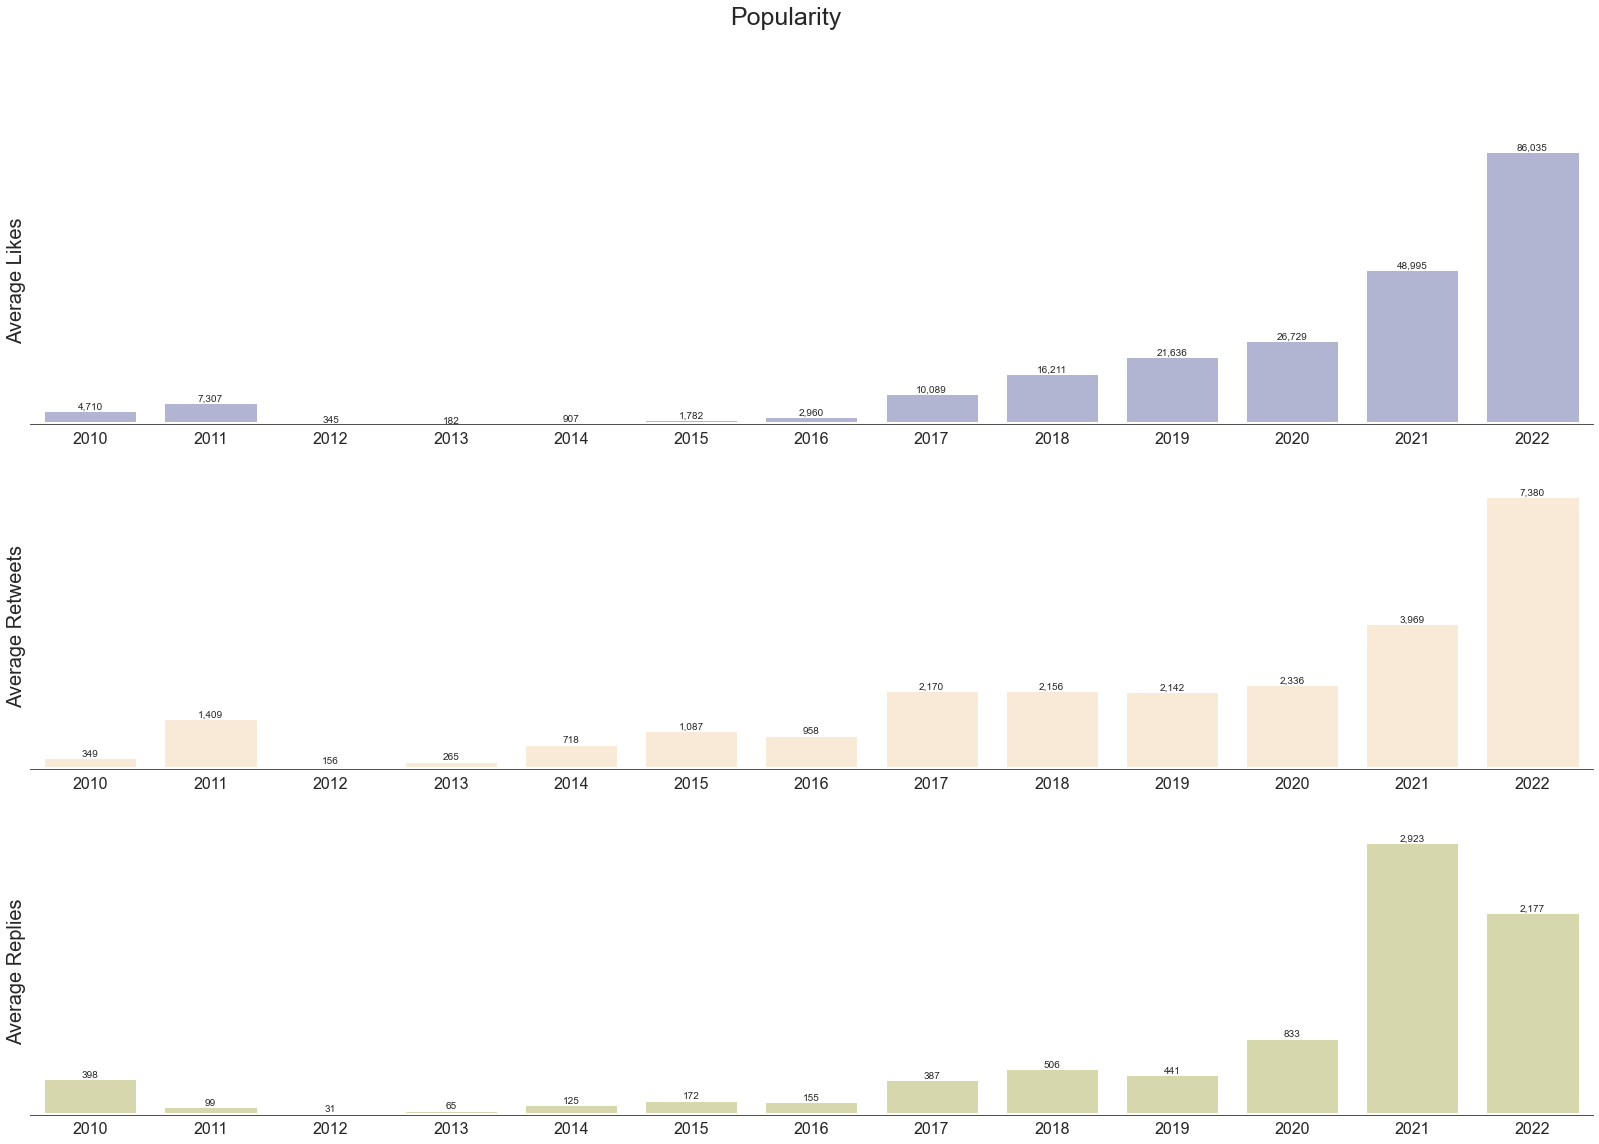

In [21]:
# Plot
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(28, 18))
axs = [ax1, ax2, ax3]
plt.suptitle("Popularity", size=25)
sns.barplot(data=popularity_df, x="year_object", y="likes_count", lw=5, color=my_colors[1], ax=ax1)
sns.barplot(data=popularity_df, x="year_object", y="retweets_count", lw=5, color=my_colors[3], ax=ax2)
sns.barplot(data=popularity_df, x="year_object", y="replies_count", lw=5, color=my_colors[4], ax=ax3)
names = ["Average Likes", "Average Retweets", "Average Replies"]
# names = ["Număr mediu de like-uri", "Număr mediu retweeturi", "Număr mediu replies"]
for ax, n in zip(axs, names):
    ax.set_xlabel("", size=20)
    ax.set_ylabel(n, size=20)
    ax.get_yaxis().set_ticks([])
#     ax.title.set_text(n)
    show_values_on_bars(axs=ax, h_v="v", space=0.4)
sns.despine(left=True);

#### Visualize the data distribution

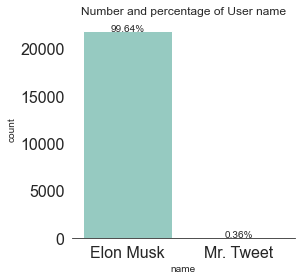

In [22]:
plot_count("name", "User name", df_copy,1)

#### PREPROCESSING DATA

In [23]:
# df_copy['created_at'].info() # --> initial it was stored as object, not as date

df_copy['created_at'] = pd.to_datetime(df_copy['created_at']).dt.tz_localize(None)
# df_copy['created_at'].info() # stored as datetime

df_copy['date'] = pd.to_datetime(df_copy['date'])
# df_copy['date'].info() # stored as datetime

Create date column based on created_at column for rows without values

In [24]:
df_copy['date'] = df_copy['created_at']
df_copy.loc[:,'date'] = pd.to_datetime(df_copy.loc[:,'date'], format="%Y-%m-%d")
df_copy['date'] = pd.to_datetime(df_copy['date'])
df_copy['date'] = df_copy['date'].dt.date

In [25]:
df_copy['hour'] = df_copy.created_at.dt.hour
df_copy['weekday'] = df_copy.created_at.dt.day_name()

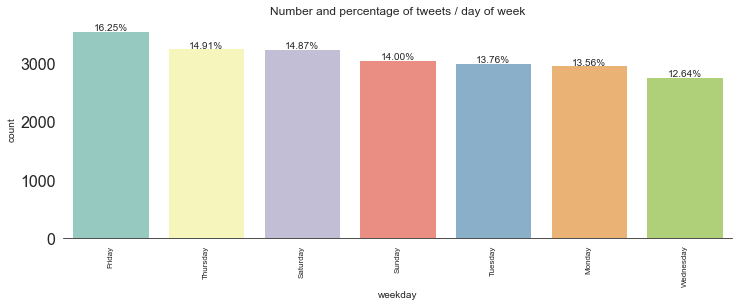

In [26]:
plot_count("weekday", "tweets / day of week", df_copy, size=3, ordered=True)

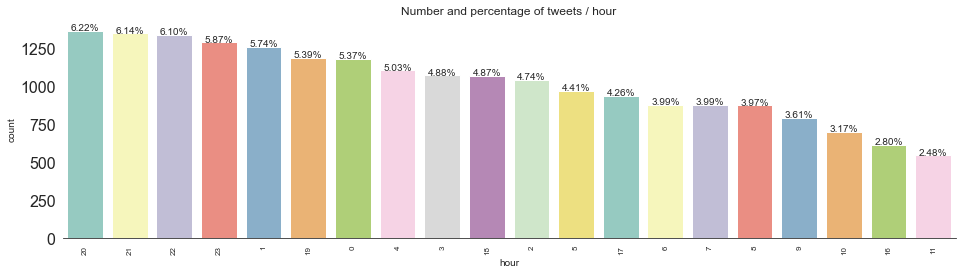

In [27]:
plot_count("hour", "tweets / hour", df_copy,size=4, ordered=True)

In [28]:
df_copy["tweet_clean_func"].isna().sum()

1016

In [29]:
df_copy["tweet_clean_func"] = df_copy["tweet_clean_func"].fillna('')

Let's talk about Bitcoin, Dogecoin and ... Tesla?

In [30]:
# Retrieve only Bitcoin Information
bitcoin_tweets = df_copy[df_copy["tweet_clean_func"].str.contains("bitcoin")].reset_index(drop = True)
dogecoin_tweets = df_copy[df_copy["tweet_clean_func"].str.contains("dogecoin")].reset_index(drop = True)
tesla_tweets = df_copy[df_copy["tweet_clean_func"].str.contains("tesla")].reset_index(drop = True)
space_tweets = df_copy[df_copy["tweet_clean_func"].str.contains("spacex")].reset_index(drop = True)
twitter_tweets = df_copy[df_copy["tweet_clean_func"].str.contains("twitter")].reset_index(drop = True)

# Information
print(color.BOLD + "% of tweets about Bitcoin:" + color.END, "{:.3}%".format(bitcoin_tweets.shape[0]/df_copy.shape[0]*100), "\n" +
      color.BOLD + "% of tweets about Dogecoin:" + color.END, "{:.3}%".format(dogecoin_tweets.shape[0]/df_copy.shape[0]*100), "\n" +
      color.BOLD + "% of tweets about Tesla:" + color.END, "{:.3}%".format(tesla_tweets.shape[0]/df_copy.shape[0]*100), "\n" +
      color.BOLD + "% of tweets about SpaceX:" + color.END, "{:.3}%".format(space_tweets.shape[0]/df_copy.shape[0]*100), "\n" +
      color.BOLD + "% of tweets about Twitter:" + color.END, "{:.3}%".format(twitter_tweets.shape[0]/df_copy.shape[0]*100))

top_btc = bitcoin_tweets.sort_values("likes_count", ascending=False)[:7]["tweet"]
print("\n", color.BOLD + "Most liked BITCOIN tweets:" + color.END)
for k, text in enumerate(top_btc):
    print(f"{k+1}. {text}")

top_tsla = tesla_tweets.sort_values("likes_count", ascending=False)[:7]["tweet"]
print("\n", color.BOLD + "Most liked TESLA tweets:" + color.END)
for k, text in enumerate(top_tsla):
    print(f"{k+1}. {text}")

top_doge = dogecoin_tweets.sort_values("likes_count", ascending=False)[:7]["tweet"]
print("\n", color.BOLD + "Most liked DOGECOIN tweets:" + color.END)
for k, text in enumerate(top_doge):
    print(f"{k+1}. {text}")

top_space = space_tweets.sort_values("likes_count", ascending=False)[:7]["tweet"]
print("\n", color.BOLD + "Most liked SPACEX tweets:" + color.END)
for k, text in enumerate(top_space):
    print(f"{k+1}. {text}")
    
top_twitter = twitter_tweets.sort_values("likes_count", ascending=False)[:7]["tweet"]
print("\n", color.BOLD + "Most liked TWITTER tweets:" + color.END)
for k, text in enumerate(top_twitter):
    print(f"{k+1}. {text}")

% of tweets about Bitcoin: 0.132% 
% of tweets about Dogecoin: 0.105% 
% of tweets about Tesla: 6.35% 
% of tweets about SpaceX: 1.58% 
% of tweets about Twitter: 2.23%

 Most liked BITCOIN tweets:
1. You can now buy a Tesla with Bitcoin
2. Spoke with North American Bitcoin miners. They committed to publish current &amp; planned renewable usage &amp; to ask miners WW to do so. Potentially promising.
3. BTC (Bitcoin) is an anagram of TBC(The Boring Company) What a coincidence!
4. Bitcoin is my safe word
5. Tesla is using only internal &amp; open source software &amp; operates Bitcoin nodes directly.  Bitcoin paid to Tesla will be retained as Bitcoin, not converted to fiat currency.
6. Pay by Bitcoin capability available outside US later this year
7. Bitcoin is almost as bs as fiat money

 Most liked TESLA tweets:
1. You can now buy a Tesla with Bitcoin
2. Tesla is restarting production today against Alameda County rules. I will be on the line with everyone else. If anyone is arrested, I

In [31]:
top_btc

12                 You can now buy a Tesla with Bitcoin
19    Spoke with North American Bitcoin miners. They...
10    BTC (Bitcoin) is an anagram of TBC(The Boring ...
7                               Bitcoin is my safe word
13    Tesla is using only internal &amp; open source...
11    Pay by Bitcoin capability available outside US...
6                 Bitcoin is almost as bs as fiat money
Name: tweet, dtype: object

In [32]:
bitcoin_tweets['likes_count'][12]

902515

In [33]:
top_tsla

1012                 You can now buy a Tesla with Bitcoin
851     Tesla is restarting production today against A...
1037                                        Tesla has 💎 🙌
1333                   @POTUS Or you can just buy a Tesla
993          Time to tell the story of Tesla &amp; SpaceX
870     Juneteenth is henceforth considered a US holid...
1231    (from making fun of Gates for shorting Tesla w...
Name: tweet, dtype: object

In [34]:
tesla_tweets['likes_count'][1012]

902515

In [35]:
top_doge

4                       Dogecoin is the people’s crypto
5     Bought some Dogecoin for lil X, so he can be a...
9     SpaceX is going to put a literal Dogecoin on t...
16    I will eat a happy meal on tv if @McDonalds ac...
20                      I will keep supporting Dogecoin
6     If major Dogecoin holders sell most of their c...
15                    Tesla merch buyable with Dogecoin
Name: tweet, dtype: object

In [36]:
dogecoin_tweets['likes_count'][4]

555730

In [37]:
top_space

241    SpaceX is going to put a literal Dogecoin on t...
243    SpaceX launching satellite Doge-1 to the moon ...
75     View from SpaceX Launch Control. Apparently, t...
228         Time to tell the story of Tesla &amp; SpaceX
198    Juneteenth is henceforth considered a US holid...
274    SpaceX is starting a program to take CO2 out o...
148    ♥️👽 SpaceX has Area 59 👽♥️  https://t.co/h4YUL...
Name: tweet, dtype: object

In [38]:
space_tweets['likes_count'][241]

535373

In [39]:
top_twitter

78     I hope that even my worst critics remain on Tw...
85                       Let’s make Twitter maximum fun!
156                       Comedy is now legal on Twitter
81     For Twitter to deserve public trust, it must b...
238                                     Twitter is ALIVE
86     Twitter DMs should have end to end encryption ...
149    Entering Twitter HQ – let that sink in! https:...
Name: tweet, dtype: object

In [40]:
twitter_tweets['likes_count'][78]

3199334

In [41]:
bitcoin_tweets.shape

(29, 20)

In [42]:
tesla_tweets.shape

(1392, 20)

In [43]:
dogecoin_tweets.shape

(23, 20)

In [44]:
space_tweets.shape

(346, 20)

In [45]:
twitter_tweets.shape

(490, 20)

#### PREPROCESSING DATA

In [46]:
df_copy['created_at'].info() # --> initial it was stored as object, not as date

df_copy['created_at'] = pd.to_datetime(df_copy['created_at']).dt.tz_localize(None)
df_copy['created_at'].info() # stored as datetime

df_copy['date'] = pd.to_datetime(df_copy['date'])
df_copy['date'].info() # stored as datetime

<class 'pandas.core.series.Series'>
RangeIndex: 21930 entries, 0 to 21929
Series name: created_at
Non-Null Count  Dtype         
--------------  -----         
21930 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 171.5 KB
<class 'pandas.core.series.Series'>
RangeIndex: 21930 entries, 0 to 21929
Series name: created_at
Non-Null Count  Dtype         
--------------  -----         
21930 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 171.5 KB
<class 'pandas.core.series.Series'>
RangeIndex: 21930 entries, 0 to 21929
Series name: date
Non-Null Count  Dtype         
--------------  -----         
21930 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 171.5 KB


TO-DO LIST:
1. When *id* is missing, fill values with *conversation_id* (mostly is the same)
2. When *date* is missing, format *created_at* and fill values with it
3. *is_retweet* is always False, we have only tweets and 0 retweets -- or drop it
4. Create some features:
    - year, month, and day from *date* column
    - hour and weekday (as name) from *created_at* column

In [47]:
df_copy.isna().sum()

id                   4136
conversation_id      5232
created_at              0
date                    0
user_id                 0
username                0
name                    0
tweet                   0
replies_count        5232
retweets_count          0
likes_count             0
is_retweet           4136
user_followers      12562
user_friends        12562
user_favourites     16698
tweet_emojis            0
tweet_clean_func        0
year_object             0
hour                    0
weekday                 0
dtype: int64

In [48]:
# fill missing values
df_copy['id'].fillna(df['conversation_id'], inplace=True)
# df_copy

Create *date* column based on *created_at* column for rows without values 

In [49]:
df_copy['date'] = df_copy['created_at']
df_copy.loc[:,'date'] = pd.to_datetime(df_copy.loc[:,'date'], format="%Y-%m-%d")
df_copy['date'] = pd.to_datetime(df_copy['date'])
df_copy['date'] = df_copy['date'].dt.date

In [50]:
df_copy['is_retweet'] = False

Create year, month, day from *date* colum

In [51]:
df_copy['day'] = pd.DatetimeIndex(df_copy['date']).day
df_copy['month'] = pd.DatetimeIndex(df_copy['date']).month
df_copy['year'] = pd.DatetimeIndex(df_copy['date']).year

Create hour and weekday from *created_at* column

In [52]:
df_copy['hour'] = df_copy.created_at.dt.hour
df_copy['weekday'] = df_copy.created_at.dt.day_name()

Drop unnecessary columns like conversation_id and is_retweet for now

In [53]:
columns_to_drop = ['conversation_id', 'is_retweet']

In [54]:
df_copy.drop(columns_to_drop, axis=1, inplace=True)

In [55]:
df_copy.head()

,id,created_at,date,user_id,username,name,tweet,replies_count,retweets_count,likes_count,...,user_friends,user_favourites,tweet_emojis,tweet_clean_func,year_object,hour,weekday,day,month,year
0,15434727182,2010-06-04 21:31:57,2010-06-04,44196397,elonmusk,Elon Musk,"Please ignore prior tweets, as that was someon...",398,349,4710,...,<NA>,<NA>,[],please ignore prior tweets as that was someone...,2010,21,Friday,4,6,2010
1,142179928203460608,2011-12-01 11:55:11,2011-12-01,44196397,elonmusk,Elon Musk,Went to Iceland on Sat to ride bumper cars on ...,31,16,191,...,<NA>,<NA>,[],went to iceland on sat to ride bumper cars on ...,2011,11,Thursday,1,12,2011
2,142188458125963264,2011-12-01 12:29:04,2011-12-01,44196397,elonmusk,Elon Musk,I made the volume on the Model S http://t.co/...,31,9,79,...,<NA>,<NA>,[],i made the volume on the model s go to 11 now ...,2011,12,Thursday,1,12,2011
3,142880871391838208,2011-12-03 10:20:28,2011-12-03,44196397,elonmusk,Elon Musk,"Great Voltaire quote, arguably better than Twa...",7,24,30,...,<NA>,<NA>,[],great voltaire quote arguably better than twai...,2011,10,Saturday,3,12,2011
4,142881284019060736,2011-12-03 10:22:07,2011-12-03,44196397,elonmusk,Elon Musk,That was a total non sequitur btw,29,6,52,...,<NA>,<NA>,[],that was a total non sequitur btw,2011,10,Saturday,3,12,2011


In [56]:
# Missing data
missing_data(df_copy)

,id,created_at,date,user_id,username,name,tweet,replies_count,retweets_count,likes_count,...,user_friends,user_favourites,tweet_emojis,tweet_clean_func,year_object,hour,weekday,day,month,year
Total,0,0,0,0,0,0,0,5232,0,0,...,12562,16698,0,0,0,0,0,0,0,0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.857729,0.0,0.0,...,57.282262,76.142271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Types,Int64,datetime64[ns],object,Int64,object,object,object,Int64,Int64,Int64,...,Int64,Int64,object,object,object,int64,object,int64,int64,int64


In [57]:
# Unique values
unique_values(df_copy)

,id,created_at,date,user_id,username,name,tweet,replies_count,retweets_count,likes_count,...,user_friends,user_favourites,tweet_emojis,tweet_clean_func,year_object,hour,weekday,day,month,year
Total,21930,21930,21930,21930,21930,21930,21930,16698,21930,21930,...,9368,5232,21930,21930,21930,21930,21930,21930,21930,21930
Uniques,21917,21918,2760,1,1,2,21663,3497,6170,14748,...,86,291,440,18037,14,24,7,31,12,14


In [58]:
# Most frequent values
most_frequent_values(df_copy)

,id,created_at,date,user_id,username,name,tweet,replies_count,retweets_count,likes_count,...,user_friends,user_favourites,tweet_emojis,tweet_clean_func,year_object,hour,weekday,day,month,year
Total,21930,21930,21930,21930,21930,21930,21930,16698,21930,21930,...,9368,5232,21930,21930,21930,21930,21930,21930,21930,21930
Most frequent item,1383280704042127360,2018-04-02 01:02:31,2018-06-17,44196397,elonmusk,Elon Musk,@BillyM2k 🤣,26,30,5,...,162,23383,[],,2022,20,Friday,9,4,2022
Frequence,2,2,59,21930,21930,21851,18,97,104,23,...,4176,308,20359,1016,4442,1363,3564,823,2540,4442
Percent from total,0.009,0.009,0.269,100.0,100.0,99.64,0.082,0.581,0.474,0.105,...,44.577,5.887,92.836,4.633,20.255,6.215,16.252,3.753,11.582,20.255


### Sentiment Analysis

Source: https://www.kaggle.com/code/gpreda/elon-musk-s-tweets and https://www.kaggle.com/code/pashupatigupta/sentiments-transformer-vader-embedding-bert/notebook

TO-DO LIST:
- import libraries
- clean data
- preprocess data
- tokenization, lemmatization
- create sentiment score
- polarity

#### Normalization
Normalizing text is the process of standardizing text so that, through NLP, computer models can better understand human input, with the end goal being to more effectively perform sentiment analysis and other types of analysis on your customer feedback.

Specifically, normalizing text with Python and the NLTK library means standardizing capitalization so that machine models don’t group capitalized words (Hey) as different from their lowercase counterparts (hey).

Source: https://monkeylearn.com/blog/text-cleaning/

In [59]:
df_copy

,id,created_at,date,user_id,username,name,tweet,replies_count,retweets_count,likes_count,...,user_friends,user_favourites,tweet_emojis,tweet_clean_func,year_object,hour,weekday,day,month,year
0,15434727182,2010-06-04 21:31:57,2010-06-04,44196397,elonmusk,Elon Musk,"Please ignore prior tweets, as that was someon...",398,349,4710,...,<NA>,<NA>,[],please ignore prior tweets as that was someone...,2010,21,Friday,4,6,2010
1,142179928203460608,2011-12-01 11:55:11,2011-12-01,44196397,elonmusk,Elon Musk,Went to Iceland on Sat to ride bumper cars on ...,31,16,191,...,<NA>,<NA>,[],went to iceland on sat to ride bumper cars on ...,2011,11,Thursday,1,12,2011
2,142188458125963264,2011-12-01 12:29:04,2011-12-01,44196397,elonmusk,Elon Musk,I made the volume on the Model S http://t.co/...,31,9,79,...,<NA>,<NA>,[],i made the volume on the model s go to 11 now ...,2011,12,Thursday,1,12,2011
3,142880871391838208,2011-12-03 10:20:28,2011-12-03,44196397,elonmusk,Elon Musk,"Great Voltaire quote, arguably better than Twa...",7,24,30,...,<NA>,<NA>,[],great voltaire quote arguably better than twai...,2011,10,Saturday,3,12,2011
4,142881284019060736,2011-12-03 10:22:07,2011-12-03,44196397,elonmusk,Elon Musk,That was a total non sequitur btw,29,6,52,...,<NA>,<NA>,[],that was a total non sequitur btw,2011,10,Saturday,3,12,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21925,1653949097970393088,2023-05-04 02:26:08,2023-05-04,44196397,elonmusk,Elon Musk,@zerohedge It’s almost like there’s a pattern,<NA>,1601,25557,...,294,23383,[],it’s almost like there’s a pattern,2023,2,Thursday,4,5,2023
21926,1653932618357022720,2023-05-04 01:20:39,2023-05-04,44196397,elonmusk,Elon Musk,@RebelNewsOnline Interesting,<NA>,1241,9821,...,294,23383,[],interesting,2023,1,Thursday,4,5,2023
21927,1653891787025690624,2023-05-03 22:38:24,2023-05-03,44196397,elonmusk,Elon Musk,@JonErlichman 14 years ago,<NA>,780,14869,...,294,23383,[],14 years ago,2023,22,Wednesday,3,5,2023
21928,1653847700780249088,2023-05-03 19:43:13,2023-05-03,44196397,elonmusk,Elon Musk,@realMeetKevin @Tesla Always tough with margin...,<NA>,965,20502,...,294,23383,[],always tough with margins for new vehicle line...,2023,19,Wednesday,3,5,2023


In [60]:
tweets = df_copy[['date', 'tweet', 'tweet_clean_func', 'tweet_emojis']]

#### Removal of end spaces

In [61]:
tweets['tweet_clean'] = tweets['tweet'].str.strip()
tweets.head()

,date,tweet,tweet_clean_func,tweet_emojis,tweet_clean
0,2010-06-04,"Please ignore prior tweets, as that was someon...",please ignore prior tweets as that was someone...,[],"Please ignore prior tweets, as that was someon..."
1,2011-12-01,Went to Iceland on Sat to ride bumper cars on ...,went to iceland on sat to ride bumper cars on ...,[],Went to Iceland on Sat to ride bumper cars on ...
2,2011-12-01,I made the volume on the Model S http://t.co/...,i made the volume on the model s go to 11 now ...,[],I made the volume on the Model S http://t.co/...
3,2011-12-03,"Great Voltaire quote, arguably better than Twa...",great voltaire quote arguably better than twai...,[],"Great Voltaire quote, arguably better than Twa..."
4,2011-12-03,That was a total non sequitur btw,that was a total non sequitur btw,[],That was a total non sequitur btw


#### 1. Hashtag Extraction using Regex

In [62]:
tweets['hashtag'] = tweets['tweet_clean'].apply(lambda x: re.findall(r'#(\w+)', x))
tweets.head()

,date,tweet,tweet_clean_func,tweet_emojis,tweet_clean,hashtag
0,2010-06-04,"Please ignore prior tweets, as that was someon...",please ignore prior tweets as that was someone...,[],"Please ignore prior tweets, as that was someon...",[]
1,2011-12-01,Went to Iceland on Sat to ride bumper cars on ...,went to iceland on sat to ride bumper cars on ...,[],Went to Iceland on Sat to ride bumper cars on ...,[]
2,2011-12-01,I made the volume on the Model S http://t.co/...,i made the volume on the model s go to 11 now ...,[],I made the volume on the Model S http://t.co/...,[]
3,2011-12-03,"Great Voltaire quote, arguably better than Twa...",great voltaire quote arguably better than twai...,[],"Great Voltaire quote, arguably better than Twa...",[]
4,2011-12-03,That was a total non sequitur btw,that was a total non sequitur btw,[],That was a total non sequitur btw,[]


In [63]:
tweets['hashtag'].value_counts()

[]                            21867
[1]                               7
[Dragon]                          6
[FalconHeavy]                     3
[2]                               3
[dragonlaunch]                    3
[DragonLaunch]                    3
[SXSW]                            2
[APSpaceChat]                     2
[OccupyMars]                      2
[NewProfilePic]                   1
[moneygang]                       1
[Armageddon69]                    1
[DeleteFacebook]                  1
[CancelNewsNetwork]               1
[JusticeForGeorge]                1
[Bitcoin]                         1
[resistanceisfutile]              1
[Mars]                            1
[ThrowFlamesResponsibly]          1
[gravitas]                        1
[teamhumanity]                    1
[FreeSpeech]                      1
[3]                               1
[donotpanic]                      1
[2, 17]                           1
[Pravduh]                         1
[FalconHeavy, SpaceX]       

In [64]:
# However, hashtags with more than one word had to segmented. 
# We segmented those hashtags into n-words using the library ekphrasis.

#installing ekphrasis
# !pip install ekphrasis

In [65]:
from ekphrasis.classes.segmenter import Segmenter
#segmenter using the word statistics from Twitter
seg_tw = Segmenter(corpus="twitter")

Reading twitter - 1grams ...
Reading twitter - 2grams ...


#### 2 . Text-Cleaning (URLs, Mentions, etc.)

In [66]:
#installing tweet-preprocessor
# !pip install tweet_preprocessor

In [67]:
tweets['tweet_clean'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21930 entries, 0 to 21929
Series name: tweet_clean
Non-Null Count  Dtype 
--------------  ----- 
21930 non-null  object
dtypes: object(1)
memory usage: 171.5+ KB


In [68]:
import preprocessor as p

def preprocess_tweet(row):
    tweet = row['tweet_clean']
    tweet = p.clean(tweet)
    return tweet

tweets['tweet_clean'] = tweets.apply(preprocess_tweet, axis=1)
tweets.head()

,date,tweet,tweet_clean_func,tweet_emojis,tweet_clean,hashtag
0,2010-06-04,"Please ignore prior tweets, as that was someon...",please ignore prior tweets as that was someone...,[],"Please ignore prior tweets, as that was someon...",[]
1,2011-12-01,Went to Iceland on Sat to ride bumper cars on ...,went to iceland on sat to ride bumper cars on ...,[],Went to Iceland on Sat to ride bumper cars on ...,[]
2,2011-12-01,I made the volume on the Model S http://t.co/...,i made the volume on the model s go to 11 now ...,[],I made the volume on the Model S go to . Now I...,[]
3,2011-12-03,"Great Voltaire quote, arguably better than Twa...",great voltaire quote arguably better than twai...,[],"Great Voltaire quote, arguably better than Twa...",[]
4,2011-12-03,That was a total non sequitur btw,that was a total non sequitur btw,[],That was a total non sequitur btw,[]


In [69]:
tweets['tweet_clean'][2]

'I made the volume on the Model S go to . Now I just need to work in a miniature Stonehenge...'

In [70]:
# # Remove URLs - already done with tweet-preprocessor
# def remove_urls(df):
#     df['tweet'] = df['tweet'].str.replace(r"http\S+", "")

# remove_urls(tweets)
# tweets.head()

#### 3. Tokenization, Removal of Digits, Stop Words and Punctuations

NLTK (Natural Language Toolkit) is one of the best library for preprocessing text data.

In [71]:
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer

[nltk_data] Downloading package wordnet to /Users/roxanel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/roxanel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Remove Digits and lower the text (makes it easy to deal with)

In [72]:
# Remove digits:
tweets['tweet_clean'] = tweets['tweet_clean'].astype(str).str.replace('\d+', '')
# tweets['tweet'] = tweets['tweet'].str.replace('\d+', '')

# Lower Casting - Normalization
tweets['tweet_clean'] = tweets['tweet_clean'].str.lower()

tweets.head()

,date,tweet,tweet_clean_func,tweet_emojis,tweet_clean,hashtag
0,2010-06-04,"Please ignore prior tweets, as that was someon...",please ignore prior tweets as that was someone...,[],"please ignore prior tweets, as that was someon...",[]
1,2011-12-01,Went to Iceland on Sat to ride bumper cars on ...,went to iceland on sat to ride bumper cars on ...,[],went to iceland on sat to ride bumper cars on ...,[]
2,2011-12-01,I made the volume on the Model S http://t.co/...,i made the volume on the model s go to 11 now ...,[],i made the volume on the model s go to . now i...,[]
3,2011-12-03,"Great Voltaire quote, arguably better than Twa...",great voltaire quote arguably better than twai...,[],"great voltaire quote, arguably better than twa...",[]
4,2011-12-03,That was a total non sequitur btw,that was a total non sequitur btw,[],that was a total non sequitur btw,[]


Remove Punctuations

In [73]:
punctuation_to_remove = string.punctuation
print("Removing...:",punctuation_to_remove)
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', punctuation_to_remove))

tweets['tweet_clean'] = tweets['tweet_clean'].apply(lambda text: remove_punctuation(text))
tweets.head()

Removing...: !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


,date,tweet,tweet_clean_func,tweet_emojis,tweet_clean,hashtag
0,2010-06-04,"Please ignore prior tweets, as that was someon...",please ignore prior tweets as that was someone...,[],please ignore prior tweets as that was someone...,[]
1,2011-12-01,Went to Iceland on Sat to ride bumper cars on ...,went to iceland on sat to ride bumper cars on ...,[],went to iceland on sat to ride bumper cars on ...,[]
2,2011-12-01,I made the volume on the Model S http://t.co/...,i made the volume on the model s go to 11 now ...,[],i made the volume on the model s go to now i ...,[]
3,2011-12-03,"Great Voltaire quote, arguably better than Twa...",great voltaire quote arguably better than twai...,[],great voltaire quote arguably better than twai...,[]
4,2011-12-03,That was a total non sequitur btw,that was a total non sequitur btw,[],that was a total non sequitur btw,[]


Removing stop words

In [74]:
# # Remove comments if not installed
# import nltk.corpus
# nltk.download('stopwords')
# from nltk.corpus import stopwords

stop_words = stopwords.words("english")
tweets['tweet_clean'] = tweets['tweet_clean'].apply(lambda x: ' '.join([item for item in x.split()
                                                                  if item not in stop_words]))
tweets.head()

,date,tweet,tweet_clean_func,tweet_emojis,tweet_clean,hashtag
0,2010-06-04,"Please ignore prior tweets, as that was someon...",please ignore prior tweets as that was someone...,[],please ignore prior tweets someone pretending ...,[]
1,2011-12-01,Went to Iceland on Sat to ride bumper cars on ...,went to iceland on sat to ride bumper cars on ...,[],went iceland sat ride bumper cars ice country ...,[]
2,2011-12-01,I made the volume on the Model S http://t.co/...,i made the volume on the model s go to 11 now ...,[],made volume model go need work miniature stone...,[]
3,2011-12-03,"Great Voltaire quote, arguably better than Twa...",great voltaire quote arguably better than twai...,[],great voltaire quote arguably better twain hea...,[]
4,2011-12-03,That was a total non sequitur btw,that was a total non sequitur btw,[],total non sequitur btw,[]


Lemmatization + Tokenization — Used a built in TweetTokenizer()

In [75]:
# TOKENIZATION
tt = TweetTokenizer()
tweets['tweet_clean'] = tweets['tweet_clean'].apply(str)
tweets['tweet_clean'] = tweets['tweet_clean'].apply(tt.tokenize)

tweets['tweet_clean_func'] = tweets['tweet_clean_func'].apply(str)
tweets['tweet_clean_func'] = tweets['tweet_clean_func'].apply(tt.tokenize)

# Lemmatization
lemmatizer = WordNetLemmatizer()

tweets['tweet_clean'] = tweets['tweet_clean'].apply(
                    lambda lst:[lemmatizer.lemmatize(word) for word in lst])

tweets['tweet_clean'] = tweets['tweet_clean'].apply(str)

tweets['tweet_clean_func'] = tweets['tweet_clean_func'].apply(
                    lambda lst:[lemmatizer.lemmatize(word) for word in lst])

tweets['tweet_clean_func'] = tweets['tweet_clean_func'].apply(str)

# import re
# p = re.compile(r'[^\w\s]+')
# tweets['tweet'] = [p.sub('', x) for x in tweets['tweet'].tolist()]

# #df["Tweets_clean"] = df["Tweets_clean"].str.replace('[^\w\s]','')
tweets.head()

,date,tweet,tweet_clean_func,tweet_emojis,tweet_clean,hashtag
0,2010-06-04,"Please ignore prior tweets, as that was someon...","['please', 'ignore', 'prior', 'tweet', 'a', 't...",[],"['please', 'ignore', 'prior', 'tweet', 'someon...",[]
1,2011-12-01,Went to Iceland on Sat to ride bumper cars on ...,"['went', 'to', 'iceland', 'on', 'sat', 'to', '...",[],"['went', 'iceland', 'sat', 'ride', 'bumper', '...",[]
2,2011-12-01,I made the volume on the Model S http://t.co/...,"['i', 'made', 'the', 'volume', 'on', 'the', 'm...",[],"['made', 'volume', 'model', 'go', 'need', 'wor...",[]
3,2011-12-03,"Great Voltaire quote, arguably better than Twa...","['great', 'voltaire', 'quote', 'arguably', 'be...",[],"['great', 'voltaire', 'quote', 'arguably', 'be...",[]
4,2011-12-03,That was a total non sequitur btw,"['that', 'wa', 'a', 'total', 'non', 'sequitur'...",[],"['total', 'non', 'sequitur', 'btw']",[]


Remove URLs

In [76]:
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

df_no_urls = [remove_url(text) for text in tweets['tweet_clean']]
df_no_urls[:1]

lower_case = [word.lower() for word in tweets['tweet_clean']]
sentences = tweets['tweet_clean']

df_no_urls[0].split()

words_in_df = [text.lower().split() for text in df_no_urls]
words_in_df[:2]

[['please', 'ignore', 'prior', 'tweet', 'someone', 'pretending', 'actually'],
 ['went',
  'iceland',
  'sat',
  'ride',
  'bumper',
  'car',
  'ice',
  'country',
  'vlads',
  'rink',
  'van',
  'nuys',
  'awesome',
  'family',
  'fun']]

In [77]:
import itertools
import collections

# Flatten list of words
all_words_nsw_nc = list(itertools.chain(*words_in_df))

# Create counter of words
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(20)

[('amp', 2732),
 ('tesla', 1478),
 ('good', 811),
 ('car', 737),
 ('yes', 713),
 ('like', 669),
 ('great', 649),
 ('time', 647),
 ('year', 621),
 ('would', 616),
 ('much', 552),
 ('make', 536),
 ('people', 532),
 ('one', 516),
 ('true', 505),
 ('twitter', 498),
 ('need', 464),
 ('model', 445),
 ('work', 432),
 ('yeah', 431)]

In [78]:
clean_df_ncw = pd.DataFrame(counts_nsw_nc.most_common(100),
                             columns=['words', 'count'])
clean_df_ncw.head()

,words,count
0,amp,2732
1,tesla,1478
2,good,811
3,car,737
4,yes,713


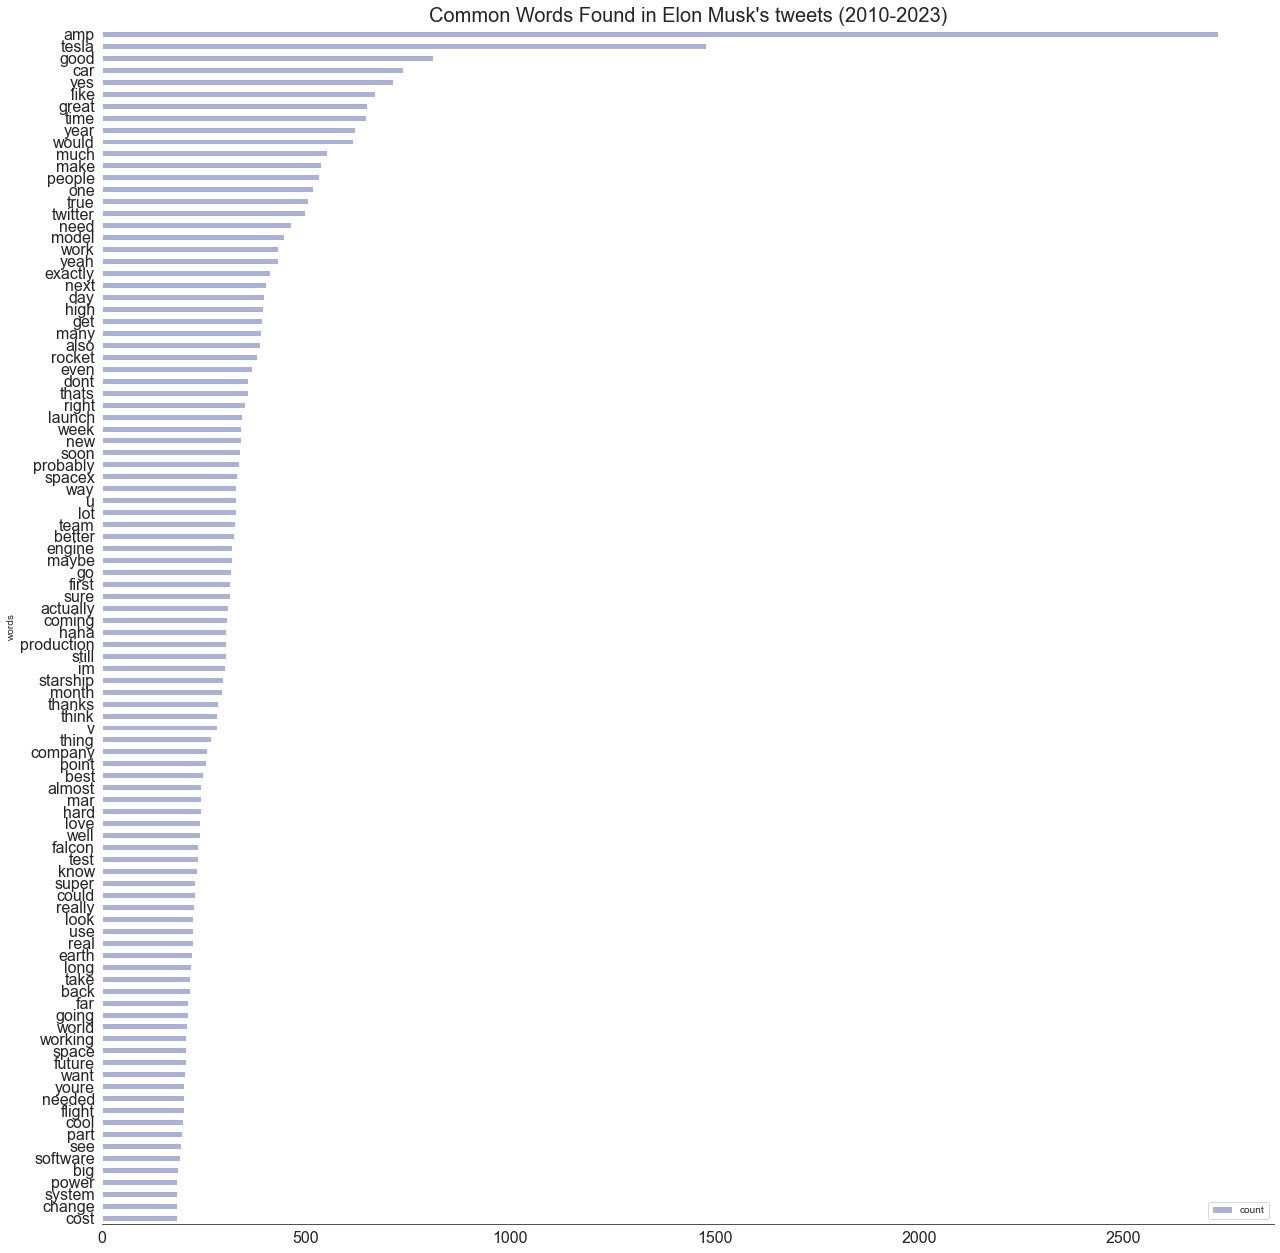

In [79]:
# plot
fig, ax = plt.subplots(figsize=(21, 22))

# Plot horizontal bar graph
clean_df_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color=my_colors[1])

ax.set_title("Common Words Found in Elon Musk's tweets (2010-2023)", size = 20)
# ax.set_title("Cele mai frecvente cuvinte folosite de Elon Musk în tweeturile sale (2010-2023)", size = 20)
plt.show()

In [80]:
text = clean_df_ncw.iloc[:, 0]
text

0        amp
1      tesla
2       good
3        car
4        yes
       ...  
95       big
96     power
97    system
98    change
99      cost
Name: words, Length: 100, dtype: object

<Figure size 432x288 with 0 Axes>

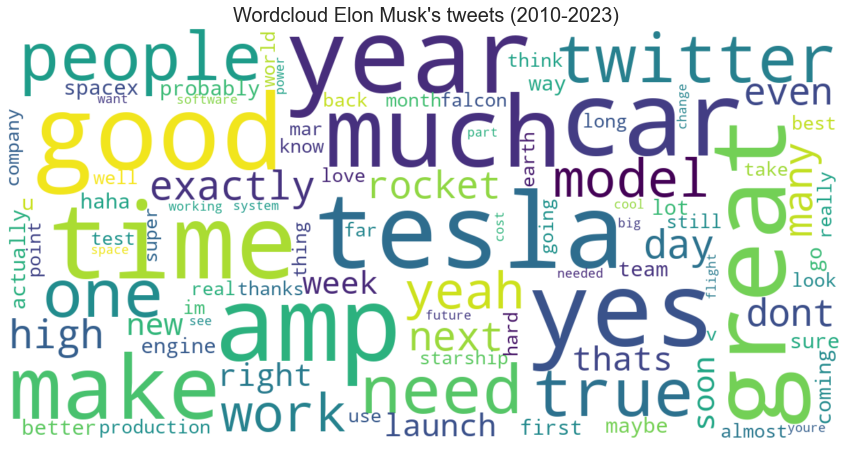

In [81]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud( max_font_size=50, max_words=100,scale=3,
                      background_color="white").generate(' '.join(clean_df_ncw['words']))
plt.figure()
plt.figure(figsize=(15,10))
title="Wordcloud Elon Musk's tweets (2010-2023)"
plt.title(title, size = 20)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file(title+".png")

Remove Punctuations

In [83]:
punctuation_to_remove = string.punctuation
print("Removing...:",punctuation_to_remove)
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', punctuation_to_remove))

tweets['tweet_clean'] = tweets['tweet_clean'].apply(lambda text: remove_punctuation(text))
tweets.head()

Removing...: !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


,date,tweet,tweet_clean_func,tweet_emojis,tweet_clean,hashtag
0,2010-06-04,"Please ignore prior tweets, as that was someon...","['please', 'ignore', 'prior', 'tweet', 'a', 't...",[],please ignore prior tweet someone pretending a...,[]
1,2011-12-01,Went to Iceland on Sat to ride bumper cars on ...,"['went', 'to', 'iceland', 'on', 'sat', 'to', '...",[],went iceland sat ride bumper car ice country v...,[]
2,2011-12-01,I made the volume on the Model S http://t.co/...,"['i', 'made', 'the', 'volume', 'on', 'the', 'm...",[],made volume model go need work miniature stone...,[]
3,2011-12-03,"Great Voltaire quote, arguably better than Twa...","['great', 'voltaire', 'quote', 'arguably', 'be...",[],great voltaire quote arguably better twain hea...,[]
4,2011-12-03,That was a total non sequitur btw,"['that', 'wa', 'a', 'total', 'non', 'sequitur'...",[],total non sequitur btw,[]


#### RULE-BASED SENTIMENT ANALYSIS 

## <font color = '#A4D0A4'> VADER

- Valence Aware Dictionary for sEntiment Reasoning (VADER)
    - is another popular rule-based sentiment analyzer. 
    - It uses a list of lexical features (e.g. word) which are labeled as positive or negative according to their semantic orientation to calculate the text sentiment.
    - returns the probability of a given input sentence to be positive, negative, and neutral. 
    
    
- Example: “The food was great!”
    - Positive : 99%;
    - Negative :1%
    - Neutral : 0%
        - These three probabilities will add up to 100%.
        
- Uses the **SentimentIntensityAnalyzer()** function;
- Indicators: polarity and compound sentiment score

In [84]:
# Helper Function to assign Label for Sentiment Analysis with Vader, TextBlob
def create_sentiment_labels(df, feature,value):
    '''
    in: 
        dataframe 
        value on which to classify
        feature - column name of the feature that receives the label
    out: 
        does not return a value
        modifies the dataframe received as parameter
    '''

    df.loc[df[value] > 0,feature] = 'positive'
    df.loc[df[value] == 0,feature] = 'neutral'
    df.loc[df[value] < 0,feature] = 'negative'

In [85]:
sid = SentimentIntensityAnalyzer()

In [86]:
def sentiment_analysis_vader(df, clean = True):
    if clean:
        target_col = 'tweet_clean'
        prefix = 'vader_clean_'
    else:
        target_col = 'tweet'
        prefix = 'vader_'
    
    scores_col = prefix+'scores'
    
    #let's make it vader_sentiment, so that it has the same naming convention as TextBlob and Flair sentiment score
    compound_col = prefix+'compound'
#     compound_col = prefix+'polarity' # cnf kaggle
    comp_score_col = prefix+'sentiment' 
    
    df[scores_col] = df[target_col].apply(lambda tweet: sid.polarity_scores(tweet))
    df[compound_col] = df[scores_col].apply(lambda d: d['compound'])
    df['vader_negative'] = df[scores_col].apply(lambda tweet: tweet['neg'])
    df['vader_positive'] = df[scores_col].apply(lambda tweet: tweet['pos'])
    df['vader_neutral'] = df[scores_col].apply(lambda tweet: tweet['neu'])
    create_sentiment_labels(df,comp_score_col,compound_col)

In [87]:
sentiment_analysis_vader(tweets)
tweets

,date,tweet,tweet_clean_func,tweet_emojis,tweet_clean,hashtag,vader_clean_scores,vader_clean_compound,vader_negative,vader_positive,vader_neutral,vader_clean_sentiment
0,2010-06-04,"Please ignore prior tweets, as that was someon...","['please', 'ignore', 'prior', 'tweet', 'a', 't...",[],please ignore prior tweet someone pretending a...,[],"{'neg': 0.245, 'neu': 0.392, 'pos': 0.363, 'co...",0.0516,0.245,0.363,0.392,positive
1,2011-12-01,Went to Iceland on Sat to ride bumper cars on ...,"['went', 'to', 'iceland', 'on', 'sat', 'to', '...",[],went iceland sat ride bumper car ice country v...,[],"{'neg': 0.0, 'neu': 0.637, 'pos': 0.363, 'comp...",0.8126,0.000,0.363,0.637,positive
2,2011-12-01,I made the volume on the Model S http://t.co/...,"['i', 'made', 'the', 'volume', 'on', 'the', 'm...",[],made volume model go need work miniature stone...,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,neutral
3,2011-12-03,"Great Voltaire quote, arguably better than Twa...","['great', 'voltaire', 'quote', 'arguably', 'be...",[],great voltaire quote arguably better twain hea...,[],"{'neg': 0.239, 'neu': 0.364, 'pos': 0.397, 'co...",0.5994,0.239,0.397,0.364,positive
4,2011-12-03,That was a total non sequitur btw,"['that', 'wa', 'a', 'total', 'non', 'sequitur'...",[],total non sequitur btw,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
21925,2023-05-04,@zerohedge It’s almost like there’s a pattern,"['it', '’', 's', 'almost', 'like', 'there', '’...",[],almost like there pattern,[],"{'neg': 0.0, 'neu': 0.576, 'pos': 0.424, 'comp...",0.2975,0.000,0.424,0.576,positive
21926,2023-05-04,@RebelNewsOnline Interesting,['interesting'],[],interesting,[],"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4019,0.000,1.000,0.000,positive
21927,2023-05-03,@JonErlichman 14 years ago,"['14', 'year', 'ago']",[],year ago,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,neutral
21928,2023-05-03,@realMeetKevin @Tesla Always tough with margin...,"['always', 'tough', 'with', 'margin', 'for', '...",[],always tough margin new vehicle line especiall...,[],"{'neg': 0.158, 'neu': 0.842, 'pos': 0.0, 'comp...",-0.1280,0.158,0.000,0.842,negative


- Tweets can reflect positive, negative or neutral sentiments
- Based on this, we can calculate 2 main indicators: *polarity* and *subjectivity*:
    - $Polarity=\frac{Positive - Negative}{Positive + Negative}$
    - $Subjectivity=\frac{Positive + Negative}{N}$
    - $N = (Positive, Negative, Neutral)$

In [88]:
tweets['vader_clean_polarity']=(tweets.vader_positive-tweets.vader_negative)/(tweets.vader_positive+tweets.vader_negative)
tweets

,date,tweet,tweet_clean_func,tweet_emojis,tweet_clean,hashtag,vader_clean_scores,vader_clean_compound,vader_negative,vader_positive,vader_neutral,vader_clean_sentiment,vader_clean_polarity
0,2010-06-04,"Please ignore prior tweets, as that was someon...","['please', 'ignore', 'prior', 'tweet', 'a', 't...",[],please ignore prior tweet someone pretending a...,[],"{'neg': 0.245, 'neu': 0.392, 'pos': 0.363, 'co...",0.0516,0.245,0.363,0.392,positive,0.194079
1,2011-12-01,Went to Iceland on Sat to ride bumper cars on ...,"['went', 'to', 'iceland', 'on', 'sat', 'to', '...",[],went iceland sat ride bumper car ice country v...,[],"{'neg': 0.0, 'neu': 0.637, 'pos': 0.363, 'comp...",0.8126,0.000,0.363,0.637,positive,1.000000
2,2011-12-01,I made the volume on the Model S http://t.co/...,"['i', 'made', 'the', 'volume', 'on', 'the', 'm...",[],made volume model go need work miniature stone...,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,neutral,NaN
3,2011-12-03,"Great Voltaire quote, arguably better than Twa...","['great', 'voltaire', 'quote', 'arguably', 'be...",[],great voltaire quote arguably better twain hea...,[],"{'neg': 0.239, 'neu': 0.364, 'pos': 0.397, 'co...",0.5994,0.239,0.397,0.364,positive,0.248428
4,2011-12-03,That was a total non sequitur btw,"['that', 'wa', 'a', 'total', 'non', 'sequitur'...",[],total non sequitur btw,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,neutral,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21925,2023-05-04,@zerohedge It’s almost like there’s a pattern,"['it', '’', 's', 'almost', 'like', 'there', '’...",[],almost like there pattern,[],"{'neg': 0.0, 'neu': 0.576, 'pos': 0.424, 'comp...",0.2975,0.000,0.424,0.576,positive,1.000000
21926,2023-05-04,@RebelNewsOnline Interesting,['interesting'],[],interesting,[],"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4019,0.000,1.000,0.000,positive,1.000000
21927,2023-05-03,@JonErlichman 14 years ago,"['14', 'year', 'ago']",[],year ago,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,neutral,NaN
21928,2023-05-03,@realMeetKevin @Tesla Always tough with margin...,"['always', 'tough', 'with', 'margin', 'for', '...",[],always tough margin new vehicle line especiall...,[],"{'neg': 0.158, 'neu': 0.842, 'pos': 0.0, 'comp...",-0.1280,0.158,0.000,0.842,negative,-1.000000


In [89]:
dogecoin_tweets = tweets[tweets["tweet_clean_func"].str.contains("dogecoin")].reset_index(drop = True)
bitcoin_tweets = tweets[tweets["tweet_clean_func"].str.contains("bitcoin")].reset_index(drop = True)
tesla_tweets = tweets[tweets["tweet_clean_func"].str.contains("tesla")].reset_index(drop = True)

In [90]:
bitcoin_tweets.loc[bitcoin_tweets['tweet'] == 'You can now buy a Tesla with Bitcoin']

,date,tweet,tweet_clean_func,tweet_emojis,tweet_clean,hashtag,vader_clean_scores,vader_clean_compound,vader_negative,vader_positive,vader_neutral,vader_clean_sentiment,vader_clean_polarity
12,2021-03-24,You can now buy a Tesla with Bitcoin,"['you', 'can', 'now', 'buy', 'a', 'tesla', 'wi...",[],buy tesla bitcoin,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,0.0,1.0,neutral,NaN


In [91]:
tesla_tweets.loc[tesla_tweets['tweet'] == '(from making fun of Gates for shorting Tesla while claiming to support climate change action)']

,date,tweet,tweet_clean_func,tweet_emojis,tweet_clean,hashtag,vader_clean_scores,vader_clean_compound,vader_negative,vader_positive,vader_neutral,vader_clean_sentiment,vader_clean_polarity
1231,2022-04-24,(from making fun of Gates for shorting Tesla w...,"['from', 'making', 'fun', 'of', 'gate', 'for',...",[],making fun gate shorting tesla claiming suppor...,[],"{'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'comp...",0.7184,0.0,0.429,0.571,positive,1.0


In [92]:
dogecoin_tweets.loc[dogecoin_tweets['tweet'] == 'I will eat a happy meal on tv if @McDonalds accepts Dogecoin']

,date,tweet,tweet_clean_func,tweet_emojis,tweet_clean,hashtag,vader_clean_scores,vader_clean_compound,vader_negative,vader_positive,vader_neutral,vader_clean_sentiment,vader_clean_polarity
16,2022-01-25,I will eat a happy meal on tv if @McDonalds ac...,"['i', 'will', 'eat', 'a', 'happy', 'meal', 'on...",[],eat happy meal tv accepts dogecoin,[],"{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound...",0.7184,0.0,0.6,0.4,positive,1.0


In [93]:
bitcoin_tweets.loc[bitcoin_tweets['tweet']=='BTC (Bitcoin) is an anagram of TBC(The Boring Company) What a coincidence!']

,date,tweet,tweet_clean_func,tweet_emojis,tweet_clean,hashtag,vader_clean_scores,vader_clean_compound,vader_negative,vader_positive,vader_neutral,vader_clean_sentiment,vader_clean_polarity
10,2021-03-12,BTC (Bitcoin) is an anagram of TBC(The Boring ...,"['btc', 'bitcoin', 'is', 'an', 'anagram', 'of'...",[],btc bitcoin anagram tbcthe boring company coin...,[],"{'neg': 0.277, 'neu': 0.723, 'pos': 0.0, 'comp...",-0.3182,0.277,0.0,0.723,negative,-1.0


In [94]:
# def get_valence_relative_freq(df):
#     grouped = df.sort_values('vader_clean_sentiment').groupby(['vader_clean_sentiment'], sort=False)
#     valence = grouped['vader_clean_sentiment'].value_counts(normalize=False, sort=False)
#     valence = valence.droplevel(0)
#     valence = valence / valence.sum()
#     return valence

In [95]:
# import seaborn as sns
# sns.set_theme(style="darkgrid")

# tweets_tmp = get_valence_relative_freq(tweets)

# plt.figure(figsize=(8,6))
# # fig, axes = plt.subplots(1, 1, figsize=(8,5))
# plt.title('Vader sentiment analysis for Elon Musks Tweets- \nrelative frequency per valence type', fontsize=16)
# #fig.tight_layout()

# (tweets_tmp).plot(kind='bar')
# # axes[0].set_title('Elon Musks Tweets', fontsize = 16)
# plt.xlabel('Valence', fontsize = 14)
# plt.ylabel('Relative frequency', fontsize = 14)
# plt.ylim(0, .5)

In [96]:
# bins = 50

# fig = plt.figure(figsize=(8,5))
# fig.suptitle('Histograms of tweets polarity per candidate (VADER)', fontsize=16)

# plt.hist(tweets['vader_clean_polarity'], bins = bins, alpha = 0.5, color = 'r')
# plt.hist(tweets['vader_clean_compound'], bins = bins, alpha = 0.5, color = 'b')
# axes = plt.gca()
# axes.set_ylim(0, 4000)

# labels= ["Elon Musk's Tweets - polarity", "Elon Musk's Tweets - compound sentiment"]
# axes.legend(labels)

# fig.tight_layout(rect=[0, 0.03, 1, 0.88])
# plt.show()

In [97]:
final_tweets = tweets.groupby(['date'])['tweet_clean', 'vader_clean_compound','vader_clean_polarity',
                                       'vader_negative', 'vader_positive', 'vader_neutral'].mean()
final_tweets

,vader_clean_compound,vader_clean_polarity,vader_negative,vader_positive,vader_neutral
date,,,,,
2010-06-04,0.051600,0.194079,0.245000,0.363000,0.392000
2011-12-01,0.406300,1.000000,0.000000,0.181500,0.818500
2011-12-03,0.299700,0.248428,0.119500,0.198500,0.682000
2011-12-04,0.734600,1.000000,0.000000,0.508000,0.492000
2011-12-21,0.269667,0.477783,0.121167,0.264833,0.613833
...,...,...,...,...,...
2023-05-09,0.095414,0.313293,0.129093,0.275302,0.572302
2023-05-10,0.181463,0.762771,0.036657,0.276943,0.629229
2023-05-11,0.176788,0.600000,0.035706,0.241353,0.722941


In [98]:
tweets.index = pd.to_datetime(tweets.date)
sentiment_vader = tweets['vader_clean_compound'].resample("d").mean()
polarity_vader = tweets['vader_clean_polarity'].resample("d").mean()

# For negative, positive and neutral sentiment values:

negative_vader = tweets['vader_negative'].resample("d").mean()
positive_vader = tweets['vader_positive'].resample("d").mean()
neutral_vader = tweets['vader_neutral'].resample("d").mean()

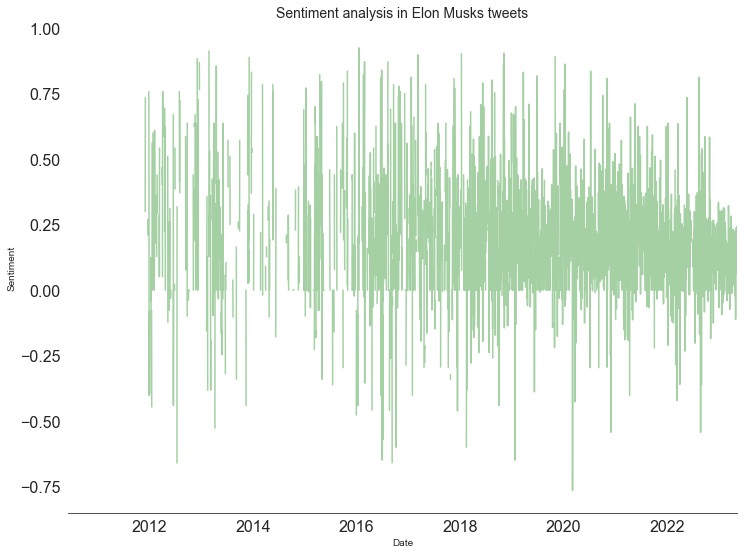

In [99]:
plt.figure(figsize=(12, 9))

sentiment_vader.plot(color='#A4D0A4')
plt.xlabel('Date')
plt.ylabel('Sentiment') 
plt.title('Sentiment analysis in Elon Musks tweets', size = 14) 
plt.show()

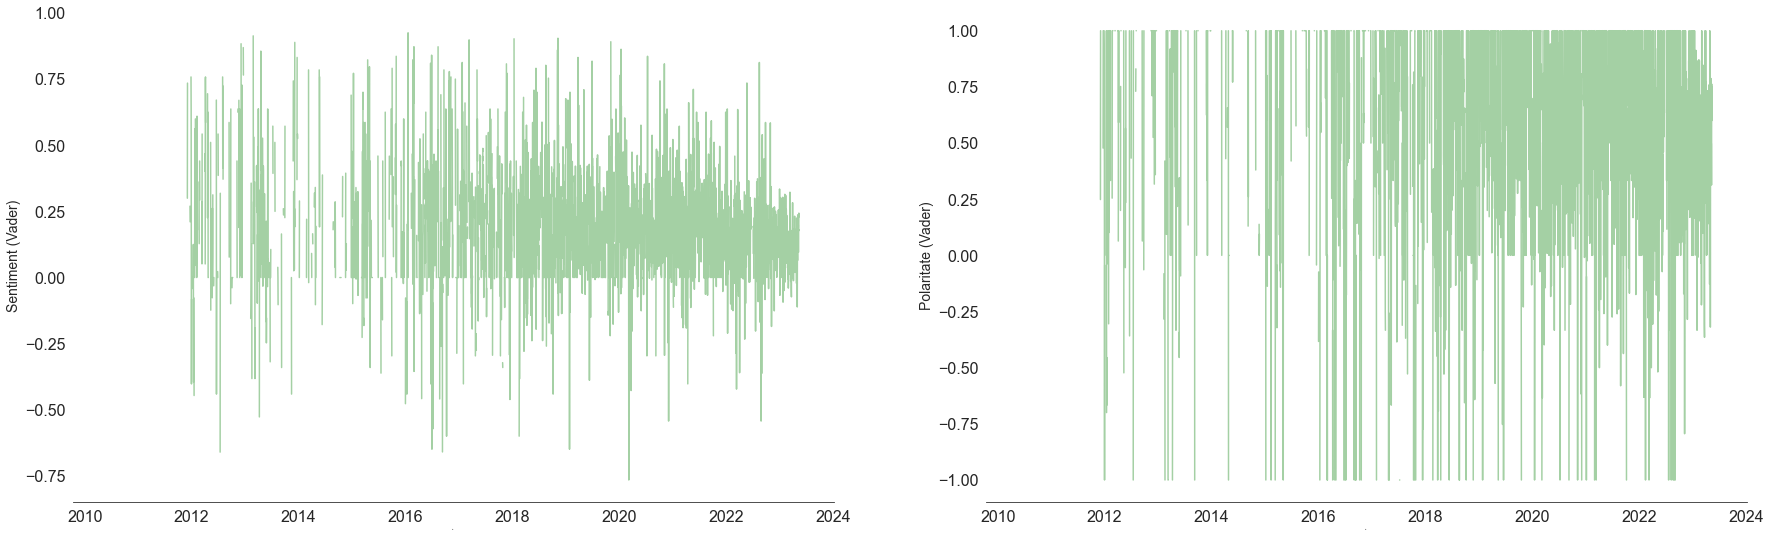

In [100]:
fig, ax = plt.subplots(1,2, figsize = (30, 20))

ax0 = plt.subplot(2, 2, 1)
ax0.plot(sentiment_vader, c='#A4D0A4')
plt.ylabel('Sentiment (Vader)', size = 14)
plt.xlabel( 'Date', size = 1)
# plt.title('Subjectivity analysis in Elon Musks tweets', size=14)

ax1 = plt.subplot(2, 2, 2)
ax1.plot(polarity_vader, c='#A4D0A4')
plt.ylabel('Polaritate (Vader)', size = 14)
plt.xlabel( 'Date', size = 1)
# plt.title('Polarity analysis in Elon Musks tweets', size=14)

plt.show()

## <font color = '#8294C4'> TEXT BLOB

TextBlob returns polarity and subjectivity of a sentence. Polarity lies between [-1,1], -1 defines a negative sentiment and 1 defines a positive sentiment. Negation words reverse the polarity. TextBlob has semantic labels that help with fine-grained analysis. For example — emoticons, exclamation mark, emojis, etc. Subjectivity lies between [0,1]. Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information. 

In [101]:
from textblob import TextBlob

In [102]:
# Polarity and subjectivity
def sentiment_analysis(df):
    df['blob_polarity'] = df['tweet_clean'].apply(lambda x: TextBlob(x).sentiment.polarity)
    df['blob_subjectivity'] = df['tweet_clean'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

    create_sentiment_labels(df, 'blob_sentiment','blob_polarity')
    
    return df[['tweet_clean','blob_polarity','blob_subjectivity','blob_sentiment']].head()   

In [103]:
sentiment_analysis(tweets)
tweets

,date,tweet,tweet_clean_func,tweet_emojis,tweet_clean,hashtag,vader_clean_scores,vader_clean_compound,vader_negative,vader_positive,vader_neutral,vader_clean_sentiment,vader_clean_polarity,blob_polarity,blob_subjectivity,blob_sentiment
date,,,,,,,,,,,,,,,,
2010-06-04,2010-06-04,"Please ignore prior tweets, as that was someon...","['please', 'ignore', 'prior', 'tweet', 'a', 't...",[],please ignore prior tweet someone pretending a...,[],"{'neg': 0.245, 'neu': 0.392, 'pos': 0.363, 'co...",0.0516,0.245,0.363,0.392,positive,0.194079,0.000000,0.050000,neutral
2011-12-01,2011-12-01,Went to Iceland on Sat to ride bumper cars on ...,"['went', 'to', 'iceland', 'on', 'sat', 'to', '...",[],went iceland sat ride bumper car ice country v...,[],"{'neg': 0.0, 'neu': 0.637, 'pos': 0.363, 'comp...",0.8126,0.000,0.363,0.637,positive,1.000000,0.650000,0.600000,positive
2011-12-01,2011-12-01,I made the volume on the Model S http://t.co/...,"['i', 'made', 'the', 'volume', 'on', 'the', 'm...",[],made volume model go need work miniature stone...,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,neutral,NaN,0.000000,0.000000,neutral
2011-12-03,2011-12-03,"Great Voltaire quote, arguably better than Twa...","['great', 'voltaire', 'quote', 'arguably', 'be...",[],great voltaire quote arguably better twain hea...,[],"{'neg': 0.239, 'neu': 0.364, 'pos': 0.397, 'co...",0.5994,0.239,0.397,0.364,positive,0.248428,0.550000,0.633333,positive
2011-12-03,2011-12-03,That was a total non sequitur btw,"['that', 'wa', 'a', 'total', 'non', 'sequitur'...",[],total non sequitur btw,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,neutral,NaN,0.000000,0.750000,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-04,2023-05-04,@zerohedge It’s almost like there’s a pattern,"['it', '’', 's', 'almost', 'like', 'there', '’...",[],almost like there pattern,[],"{'neg': 0.0, 'neu': 0.576, 'pos': 0.424, 'comp...",0.2975,0.000,0.424,0.576,positive,1.000000,0.000000,0.000000,neutral
2023-05-04,2023-05-04,@RebelNewsOnline Interesting,['interesting'],[],interesting,[],"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4019,0.000,1.000,0.000,positive,1.000000,0.500000,0.500000,positive
2023-05-03,2023-05-03,@JonErlichman 14 years ago,"['14', 'year', 'ago']",[],year ago,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,neutral,NaN,0.000000,0.000000,neutral


In [104]:
# tweets.index = pd.to_datetime(tweets.date)
subjectivity_blob = tweets['blob_subjectivity'].resample("d").mean()
polarity_blob = tweets['blob_polarity'].resample("d").mean()

In [105]:
dogecoin_tweets = tweets[tweets["tweet_clean_func"].str.contains("dogecoin")].reset_index(drop = True)
bitcoin_tweets = tweets[tweets["tweet_clean_func"].str.contains("bitcoin")].reset_index(drop = True)
tesla_tweets = tweets[tweets["tweet_clean_func"].str.contains("tesla")].reset_index(drop = True)

In [106]:
bitcoin_tweets.loc[bitcoin_tweets['tweet'] == 'You can now buy a Tesla with Bitcoin']

,date,tweet,tweet_clean_func,tweet_emojis,tweet_clean,hashtag,vader_clean_scores,vader_clean_compound,vader_negative,vader_positive,vader_neutral,vader_clean_sentiment,vader_clean_polarity,blob_polarity,blob_subjectivity,blob_sentiment
12,2021-03-24,You can now buy a Tesla with Bitcoin,"['you', 'can', 'now', 'buy', 'a', 'tesla', 'wi...",[],buy tesla bitcoin,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,0.0,1.0,neutral,NaN,0.0,0.0,neutral


In [107]:
tesla_tweets.loc[tesla_tweets['tweet'] == '(from making fun of Gates for shorting Tesla while claiming to support climate change action)']

,date,tweet,tweet_clean_func,tweet_emojis,tweet_clean,hashtag,vader_clean_scores,vader_clean_compound,vader_negative,vader_positive,vader_neutral,vader_clean_sentiment,vader_clean_polarity,blob_polarity,blob_subjectivity,blob_sentiment
1231,2022-04-24,(from making fun of Gates for shorting Tesla w...,"['from', 'making', 'fun', 'of', 'gate', 'for',...",[],making fun gate shorting tesla claiming suppor...,[],"{'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'comp...",0.7184,0.0,0.429,0.571,positive,1.0,0.2,0.15,positive


In [108]:
dogecoin_tweets.loc[dogecoin_tweets['tweet'] == 'I will eat a happy meal on tv if @McDonalds accepts Dogecoin']

,date,tweet,tweet_clean_func,tweet_emojis,tweet_clean,hashtag,vader_clean_scores,vader_clean_compound,vader_negative,vader_positive,vader_neutral,vader_clean_sentiment,vader_clean_polarity,blob_polarity,blob_subjectivity,blob_sentiment
16,2022-01-25,I will eat a happy meal on tv if @McDonalds ac...,"['i', 'will', 'eat', 'a', 'happy', 'meal', 'on...",[],eat happy meal tv accepts dogecoin,[],"{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound...",0.7184,0.0,0.6,0.4,positive,1.0,0.8,1.0,positive


In [109]:
bitcoin_tweets.loc[bitcoin_tweets['tweet']=='BTC (Bitcoin) is an anagram of TBC(The Boring Company) What a coincidence!']

,date,tweet,tweet_clean_func,tweet_emojis,tweet_clean,hashtag,vader_clean_scores,vader_clean_compound,vader_negative,vader_positive,vader_neutral,vader_clean_sentiment,vader_clean_polarity,blob_polarity,blob_subjectivity,blob_sentiment
10,2021-03-12,BTC (Bitcoin) is an anagram of TBC(The Boring ...,"['btc', 'bitcoin', 'is', 'an', 'anagram', 'of'...",[],btc bitcoin anagram tbcthe boring company coin...,[],"{'neg': 0.277, 'neu': 0.723, 'pos': 0.0, 'comp...",-0.3182,0.277,0.0,0.723,negative,-1.0,-1.0,1.0,negative


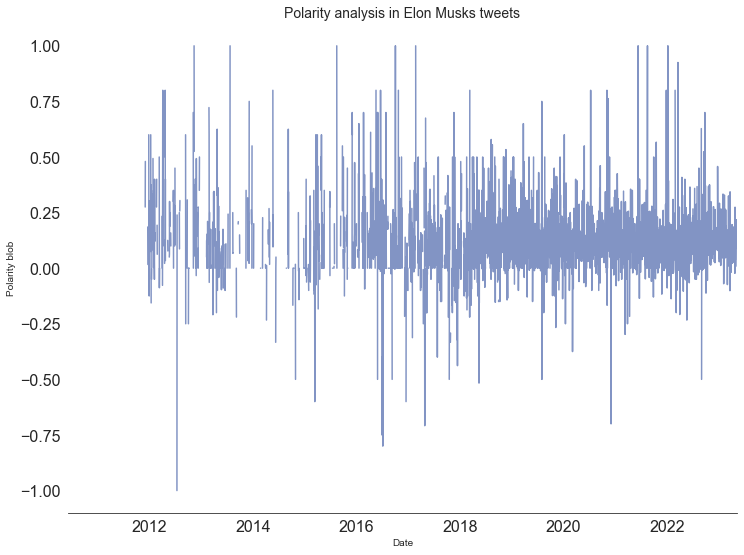

In [110]:
plt.figure(figsize=(12, 9))

polarity_blob.plot(color='#8294C4')
plt.xlabel('Date')
plt.ylabel('Polarity blob') 
plt.title('Polarity analysis in Elon Musks tweets', size=14) 
plt.show()


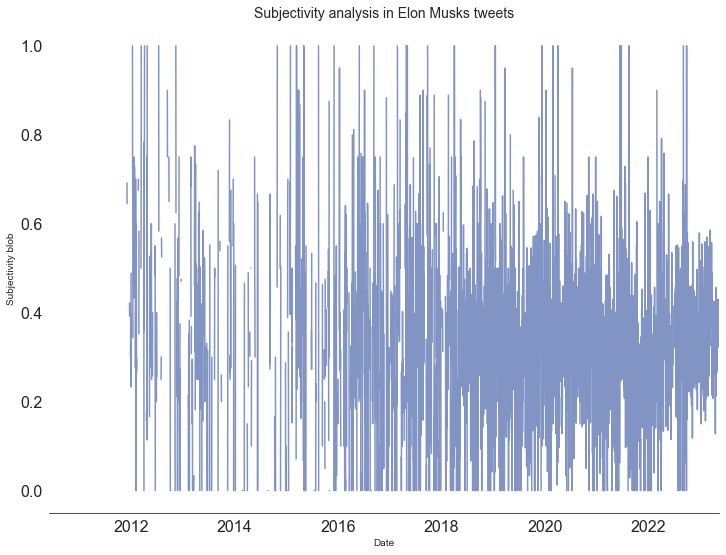

In [111]:
plt.figure(figsize=(12, 9))

subjectivity_blob.plot(color='#8294C4')
plt.xlabel('Date')
plt.ylabel('Subjectivity blob') 
plt.title('Subjectivity analysis in Elon Musks tweets', size=14) 
plt.show()

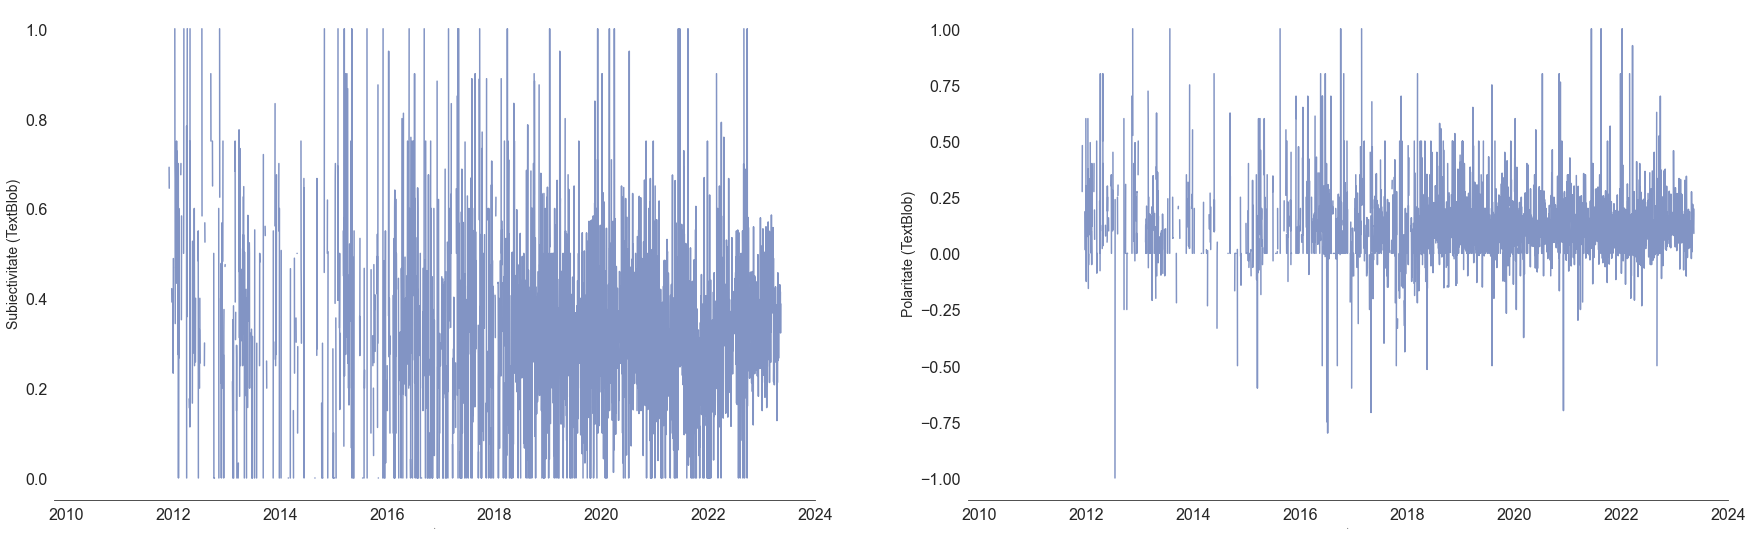

In [112]:
fig, ax = plt.subplots(1,2, figsize = (30, 20))

ax0 = plt.subplot(2, 2, 1)
ax0.plot(subjectivity_blob, c='#8294C4')
plt.ylabel('Subiectivitate (TextBlob)', size = 14)
plt.xlabel( 'Date', size = 1)
# plt.title('Subjectivity analysis in Elon Musks tweets', size=14)

ax1 = plt.subplot(2, 2, 2)
ax1.plot(polarity_blob, c='#8294C4')
plt.ylabel('Polaritate (TextBlob)', size = 14)
plt.xlabel( 'Date', size = 1)
# plt.title('Polarity analysis in Elon Musks tweets', size=14)

plt.show()

#### EMBEDDING BASED MODELS

## <font color = '#BE5A83'> FLAIR

In [113]:
import flair
from flair.models import TextClassifier
from flair.data import Sentence
from segtok.segmenter import split_single
import pandas as pd
import re
classifier = TextClassifier.load('en-sentiment')

In [114]:
# Top liked tweets from EM
sentence_BTC = Sentence('You can now buy a Tesla with Bitcoin')
sentence_TSLA = Sentence('Tesla is restarting production today against Alameda County rules. I will be on the line with everyone else. If anyone is arrested, I ask that it only be me.')
sentence_DOGE = Sentence('Dogecoin is the people’s crypto')

classifier.predict(sentence_BTC)
classifier.predict(sentence_TSLA)
classifier.predict(sentence_DOGE)

# print sentence with predicted labels
print('BTC Sentence above is: ', sentence_BTC.labels)
print('TSLA Sentence above is: ', sentence_TSLA.labels)
print('DOGE Sentence above is: ', sentence_DOGE.labels)

BTC Sentence above is:  ['Sentence[8]: "You can now buy a Tesla with Bitcoin"'/'NEGATIVE' (0.8046)]
TSLA Sentence above is:  ['Sentence[33]: "Tesla is restarting production today against Alameda County rules. I will be on the line with everyone else. If anyone is arrested, I ask that it only be me."'/'POSITIVE' (0.9183)]
DOGE Sentence above is:  ['Sentence[6]: "Dogecoin is the people’s crypto"'/'NEGATIVE' (0.5759)]


In [115]:
# Top liked tweets from EM
sentence1 = Sentence('You can now buy a Tesla with Bitcoin')
sentence2 = Sentence('(from making fun of Gates for shorting Tesla while claiming to support climate change action)')
sentence3 = Sentence('I will eat a happy meal on tv if @McDonalds accepts Dogecoin')
sentence4 = Sentence('BTC (Bitcoin) is an anagram of TBC(The Boring Company) What a coincidence!')

classifier.predict(sentence1)
classifier.predict(sentence2)
classifier.predict(sentence3)
classifier.predict(sentence4)

# print sentence with predicted labels
print('Sentence1 above is: ', sentence1.labels)
print('Sentence2 above is: ', sentence2.labels)
print('Sentence3 above is: ', sentence3.labels)
print('Sentence4 above is: ', sentence4.labels)

Sentence1 above is:  ['Sentence[8]: "You can now buy a Tesla with Bitcoin"'/'NEGATIVE' (0.8046)]
Sentence2 above is:  ['Sentence[17]: "(from making fun of Gates for shorting Tesla while claiming to support climate change action)"'/'NEGATIVE' (0.9979)]
Sentence3 above is:  ['Sentence[13]: "I will eat a happy meal on tv if @McDonalds accepts Dogecoin"'/'POSITIVE' (0.963)]
Sentence4 above is:  ['Sentence[18]: "BTC (Bitcoin) is an anagram of TBC(The Boring Company) What a coincidence!"'/'NEGATIVE' (0.5411)]


In [116]:
sentiment = []
probs = []

# df['Phrase'] = tweets['tweet_clean']
for sentence in tweets['tweet_clean']:
    if sentence == "":
        sentiment.append("")
        probs.append(0)
        
    else:
        sample = flair.data.Sentence(sentence)
        classifier.predict(sample)

        sentiment.append(sample.labels[0].value)
        probs.append(sample.labels[0].score)

In [117]:
tweets['sentiment_flair'] = sentiment
tweets['probability_flair'] = probs # between [0-1]

In [118]:
tweets

,date,tweet,tweet_clean_func,tweet_emojis,tweet_clean,hashtag,vader_clean_scores,vader_clean_compound,vader_negative,vader_positive,vader_neutral,vader_clean_sentiment,vader_clean_polarity,blob_polarity,blob_subjectivity,blob_sentiment,sentiment_flair,probability_flair
date,,,,,,,,,,,,,,,,,,
2010-06-04,2010-06-04,"Please ignore prior tweets, as that was someon...","['please', 'ignore', 'prior', 'tweet', 'a', 't...",[],please ignore prior tweet someone pretending a...,[],"{'neg': 0.245, 'neu': 0.392, 'pos': 0.363, 'co...",0.0516,0.245,0.363,0.392,positive,0.194079,0.000000,0.050000,neutral,NEGATIVE,0.999413
2011-12-01,2011-12-01,Went to Iceland on Sat to ride bumper cars on ...,"['went', 'to', 'iceland', 'on', 'sat', 'to', '...",[],went iceland sat ride bumper car ice country v...,[],"{'neg': 0.0, 'neu': 0.637, 'pos': 0.363, 'comp...",0.8126,0.000,0.363,0.637,positive,1.000000,0.650000,0.600000,positive,POSITIVE,0.996815
2011-12-01,2011-12-01,I made the volume on the Model S http://t.co/...,"['i', 'made', 'the', 'volume', 'on', 'the', 'm...",[],made volume model go need work miniature stone...,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,neutral,NaN,0.000000,0.000000,neutral,POSITIVE,0.953198
2011-12-03,2011-12-03,"Great Voltaire quote, arguably better than Twa...","['great', 'voltaire', 'quote', 'arguably', 'be...",[],great voltaire quote arguably better twain hea...,[],"{'neg': 0.239, 'neu': 0.364, 'pos': 0.397, 'co...",0.5994,0.239,0.397,0.364,positive,0.248428,0.550000,0.633333,positive,NEGATIVE,0.969831
2011-12-03,2011-12-03,That was a total non sequitur btw,"['that', 'wa', 'a', 'total', 'non', 'sequitur'...",[],total non sequitur btw,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,neutral,NaN,0.000000,0.750000,neutral,POSITIVE,0.954011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-04,2023-05-04,@zerohedge It’s almost like there’s a pattern,"['it', '’', 's', 'almost', 'like', 'there', '’...",[],almost like there pattern,[],"{'neg': 0.0, 'neu': 0.576, 'pos': 0.424, 'comp...",0.2975,0.000,0.424,0.576,positive,1.000000,0.000000,0.000000,neutral,POSITIVE,0.692990
2023-05-04,2023-05-04,@RebelNewsOnline Interesting,['interesting'],[],interesting,[],"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4019,0.000,1.000,0.000,positive,1.000000,0.500000,0.500000,positive,POSITIVE,0.978067
2023-05-03,2023-05-03,@JonErlichman 14 years ago,"['14', 'year', 'ago']",[],year ago,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,neutral,NaN,0.000000,0.000000,neutral,NEGATIVE,0.675616


In [119]:
# tweets.index = pd.to_datetime(tweets.date)
flair = tweets['probability_flair'].resample("d").mean()

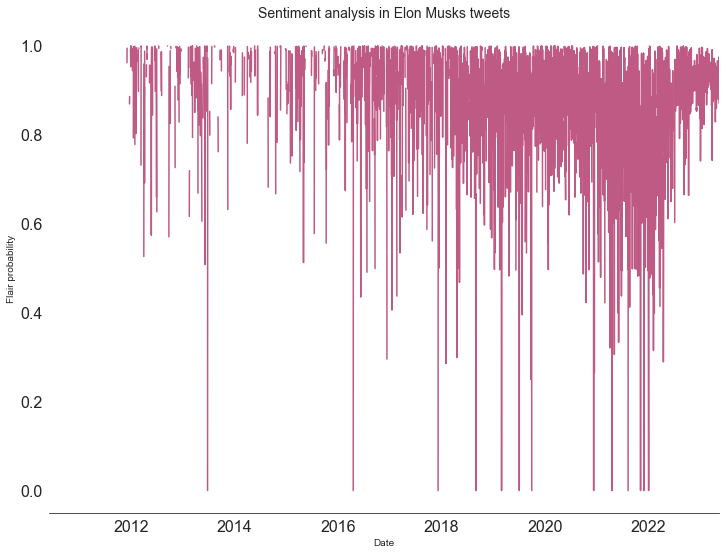

In [120]:
plt.figure(figsize=(12, 9))

flair.plot(color='#BE5A83')
plt.xlabel('Date')
plt.ylabel('Flair probability') 
plt.title('Sentiment analysis in Elon Musks tweets', size=14) 
plt.show()

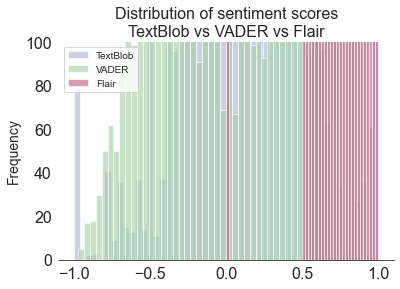

In [121]:
bins = 50
alpha = 0.6
fig = plt.plot(figsize=(7,10))

plt.title('Distribution of sentiment scores\nTextBlob vs VADER vs Flair', fontsize=16)

ax = plt.gca()

ax.hist(tweets['blob_polarity'], bins = bins, alpha = alpha, color = '#ACB1D6')
ax.hist(tweets['vader_clean_compound'], bins = bins, alpha = alpha, color = '#A4D0A4')
ax.hist(tweets['probability_flair'], bins = bins, alpha = alpha, color = '#BE5A83')
ax.set_ylim(0, 100)
labels= ["TextBlob", "VADER", "Flair"]
ax.legend(labels)

ax.set_ylabel('Frequency', fontsize = 14)

#fig.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.show()

In [122]:
tweets.columns

Index(['date', 'tweet', 'tweet_clean_func', 'tweet_emojis', 'tweet_clean',
       'hashtag', 'vader_clean_scores', 'vader_clean_compound',
       'vader_negative', 'vader_positive', 'vader_neutral',
       'vader_clean_sentiment', 'vader_clean_polarity', 'blob_polarity',
       'blob_subjectivity', 'blob_sentiment', 'sentiment_flair',
       'probability_flair'],
      dtype='object')

In [123]:
from sklearn.metrics import accuracy_score

In [124]:
print(f"Tweets classified similarly TextBlob - VADER: {accuracy_score(tweets['blob_sentiment'],tweets['vader_clean_sentiment']):.4}")
print(f"Tweets classified similarly TextBlob - Flair: {accuracy_score(tweets['blob_sentiment'],tweets['sentiment_flair']):.4}")
print(f"Tweets classified similarly VADER - Flair: {accuracy_score(tweets['vader_clean_sentiment'],tweets['sentiment_flair']):.4}")

Tweets classified similarly TextBlob - VADER: 0.6614
Tweets classified similarly TextBlob - Flair: 0.0
Tweets classified similarly VADER - Flair: 0.0


The drawback of using a flair pre-trained model for sentiment analysis is that it is trained on IMDB data and this model might not generalize well on data from other domains like twitter.

In [125]:
def classified_similarly(row):
    count = 0
    count += row['blob_sentiment']==row['vader_clean_sentiment']
    count += row['blob_sentiment']==row['sentiment_flair']
    count += row['vader_clean_sentiment']==row['sentiment_flair']

    return count

tweets['classified_similarly'] = tweets.apply(lambda row: classified_similarly(row), axis=1)

print(tweets['classified_similarly'].value_counts())

1    14504
0     7426
Name: classified_similarly, dtype: int64


In [126]:
tweets.head()

,date,tweet,tweet_clean_func,tweet_emojis,tweet_clean,hashtag,vader_clean_scores,vader_clean_compound,vader_negative,vader_positive,vader_neutral,vader_clean_sentiment,vader_clean_polarity,blob_polarity,blob_subjectivity,blob_sentiment,sentiment_flair,probability_flair,classified_similarly
date,,,,,,,,,,,,,,,,,,,
2010-06-04,2010-06-04,"Please ignore prior tweets, as that was someon...","['please', 'ignore', 'prior', 'tweet', 'a', 't...",[],please ignore prior tweet someone pretending a...,[],"{'neg': 0.245, 'neu': 0.392, 'pos': 0.363, 'co...",0.0516,0.245,0.363,0.392,positive,0.194079,0.00,0.050000,neutral,NEGATIVE,0.999413,0
2011-12-01,2011-12-01,Went to Iceland on Sat to ride bumper cars on ...,"['went', 'to', 'iceland', 'on', 'sat', 'to', '...",[],went iceland sat ride bumper car ice country v...,[],"{'neg': 0.0, 'neu': 0.637, 'pos': 0.363, 'comp...",0.8126,0.000,0.363,0.637,positive,1.000000,0.65,0.600000,positive,POSITIVE,0.996815,1
2011-12-01,2011-12-01,I made the volume on the Model S http://t.co/...,"['i', 'made', 'the', 'volume', 'on', 'the', 'm...",[],made volume model go need work miniature stone...,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,neutral,NaN,0.00,0.000000,neutral,POSITIVE,0.953198,1
2011-12-03,2011-12-03,"Great Voltaire quote, arguably better than Twa...","['great', 'voltaire', 'quote', 'arguably', 'be...",[],great voltaire quote arguably better twain hea...,[],"{'neg': 0.239, 'neu': 0.364, 'pos': 0.397, 'co...",0.5994,0.239,0.397,0.364,positive,0.248428,0.55,0.633333,positive,NEGATIVE,0.969831,1
2011-12-03,2011-12-03,That was a total non sequitur btw,"['that', 'wa', 'a', 'total', 'non', 'sequitur'...",[],total non sequitur btw,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,neutral,NaN,0.00,0.750000,neutral,POSITIVE,0.954011,1


In [127]:
final_tweets

,vader_clean_compound,vader_clean_polarity,vader_negative,vader_positive,vader_neutral
date,,,,,
2010-06-04,0.051600,0.194079,0.245000,0.363000,0.392000
2011-12-01,0.406300,1.000000,0.000000,0.181500,0.818500
2011-12-03,0.299700,0.248428,0.119500,0.198500,0.682000
2011-12-04,0.734600,1.000000,0.000000,0.508000,0.492000
2011-12-21,0.269667,0.477783,0.121167,0.264833,0.613833
...,...,...,...,...,...
2023-05-09,0.095414,0.313293,0.129093,0.275302,0.572302
2023-05-10,0.181463,0.762771,0.036657,0.276943,0.629229
2023-05-11,0.176788,0.600000,0.035706,0.241353,0.722941


In [128]:
bitcoin_tweets = tweets[tweets["tweet_clean_func"].str.contains("bitcoin")].reset_index(drop = True)
dogecoin_tweets = tweets[tweets["tweet_clean_func"].str.contains("dogecoin")].reset_index(drop = True)
tesla_tweets = tweets[tweets["tweet_clean_func"].str.contains("tesla")].reset_index(drop = True)

In [129]:
bitcoin_tweets

,date,tweet,tweet_clean_func,tweet_emojis,tweet_clean,hashtag,vader_clean_scores,vader_clean_compound,vader_negative,vader_positive,vader_neutral,vader_clean_sentiment,vader_clean_polarity,blob_polarity,blob_subjectivity,blob_sentiment,sentiment_flair,probability_flair,classified_similarly
0,2018-10-23,@vicentes @Grimezsz Wanna buy some Bitcoin? 😉😉...,"['wanna', 'buy', 'some', 'bitcoin']",['😉😉'],wanna buy bitcoin,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,neutral,NaN,0.000000e+00,0.000000,neutral,NEGATIVE,0.996796,1
1,2020-01-10,Bitcoin is *not* my safe word,"['bitcoin', 'is', 'not', 'my', 'safe', 'word']",[],bitcoin safe word,[],"{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...",0.4404,0.000,0.592,0.408,positive,1.000000,5.000000e-01,0.500000,positive,POSITIVE,0.990531,1
2,2020-05-02,@Bitcoin How much for some anime Bitcoin? htt...,"['how', 'much', 'for', 'some', 'anime', 'bitco...",[],much anime bitcoin,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,neutral,NaN,2.000000e-01,0.200000,positive,NEGATIVE,0.883882,0
3,2020-05-16,"@jk_rowling Pretty much, although massive curr...","['pretty', 'much', 'although', 'massive', 'cur...",['👻'],pretty much although massive currency issuance...,[],"{'neg': 0.0, 'neu': 0.745, 'pos': 0.255, 'comp...",0.5859,0.000,0.255,0.745,positive,1.000000,9.000000e-02,0.510000,positive,NEGATIVE,0.997239,1
4,2020-05-16,@jk_rowling I still only own 0.25 Bitcoins btw,"['i', 'still', 'only', 'own', '025', 'bitcoins...",[],still bitcoins btw,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,neutral,NaN,0.000000e+00,0.000000,neutral,NEGATIVE,0.999941,1
5,2020-11-17,@Maisie_Williams 🎶 Toss a bitcoin to ur Witcher 🎶,"['toss', 'a', 'bitcoin', 'to', 'ur', 'witcher']","['🎶', '🎶']",toss bitcoin ur witcher,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,neutral,NaN,0.000000e+00,0.000000,neutral,NEGATIVE,0.999905,1
6,2020-12-20,Bitcoin is almost as bs as fiat money,"['bitcoin', 'is', 'almost', 'a', 'b', 'a', 'fi...",[],bitcoin almost b fiat money,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,neutral,NaN,0.000000e+00,0.000000,neutral,NEGATIVE,0.998923,1
7,2020-12-20,Bitcoin is my safe word,"['bitcoin', 'is', 'my', 'safe', 'word']",[],bitcoin safe word,[],"{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...",0.4404,0.000,0.592,0.408,positive,1.000000,5.000000e-01,0.500000,positive,POSITIVE,0.990531,1
8,2021-02-19,"@business To be clear, I am *not* an investor,...","['to', 'be', 'clear', 'i', 'am', 'not', 'an', ...",[],clear investor engineer dont even publicly tra...,[],"{'neg': 0.182, 'neu': 0.663, 'pos': 0.155, 'co...",-0.2500,0.182,0.155,0.663,negative,-0.080119,1.110223e-17,0.430000,positive,NEGATIVE,0.993444,0
9,2021-02-19,@business Tesla’s action is not directly refle...,"['tesla', '’', 's', 'action', 'is', 'not', 'di...",[],tesla action directly reflective opinion bitco...,[],"{'neg': 0.168, 'neu': 0.711, 'pos': 0.122, 'co...",-0.2263,0.168,0.122,0.711,negative,-0.158621,6.500000e-02,0.480000,positive,NEGATIVE,0.981327,0


In [130]:
dogecoin_tweets

,date,tweet,tweet_clean_func,tweet_emojis,tweet_clean,hashtag,vader_clean_scores,vader_clean_compound,vader_negative,vader_positive,vader_neutral,vader_clean_sentiment,vader_clean_polarity,blob_polarity,blob_subjectivity,blob_sentiment,sentiment_flair,probability_flair,classified_similarly
0,2019-04-02,Dogecoin value may vary https://t.co/UWerAhPv63,"['dogecoin', 'value', 'may', 'vary']",[],dogecoin value may vary,[],"{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp...",0.3400,0.000,0.444,0.556,positive,1.000000,0.000000,0.000000,neutral,NEGATIVE,0.981104,0
1,2019-04-02,Dogecoin rulz https://t.co/flWWUgAgLU,"['dogecoin', 'rulz']",[],dogecoin rulz,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,neutral,NaN,0.000000,0.000000,neutral,NEGATIVE,0.992264,1
2,2019-04-02,@Tom_Heats Dogecoin might be my fav cryptocurr...,"['dogecoin', 'might', 'be', 'my', 'fav', 'cryp...",[],dogecoin might fav cryptocurrency pretty cool,[],"{'neg': 0.0, 'neu': 0.261, 'pos': 0.739, 'comp...",0.8176,0.000,0.739,0.261,positive,1.000000,0.300000,0.825000,positive,POSITIVE,0.962192,1
3,2020-04-25,@28delayslater @justpaulinelol Dogecoin Mode,"['dogecoin', 'mode']",[],dogecoin mode,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,neutral,NaN,0.000000,0.000000,neutral,POSITIVE,0.990528,1
4,2021-02-04,Dogecoin is the people’s crypto,"['dogecoin', 'is', 'the', 'people', '’', 's', ...",[],dogecoin people crypto,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,neutral,NaN,0.000000,0.000000,neutral,NEGATIVE,0.945280,1
5,2021-02-10,"Bought some Dogecoin for lil X, so he can be a...","['bought', 'some', 'dogecoin', 'for', 'lil', '...",[],bought dogecoin lil x toddler hodler,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,neutral,NaN,0.000000,0.000000,neutral,POSITIVE,0.927688,1
6,2021-02-15,If major Dogecoin holders sell most of their c...,"['if', 'major', 'dogecoin', 'holder', 'sell', ...",[],major dogecoin holder sell coin get full suppo...,[],"{'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'comp...",0.4019,0.000,0.184,0.816,positive,1.000000,0.203125,0.387500,positive,POSITIVE,0.934370,1
7,2021-03-02,@draecomino 2022: Dogecoin is dumb,"['2022', 'dogecoin', 'is', 'dumb']",[],dogecoin dumb,[],"{'neg': 0.767, 'neu': 0.233, 'pos': 0.0, 'comp...",-0.5106,0.767,0.000,0.233,negative,-1.000000,-0.375000,0.500000,negative,NEGATIVE,0.999775,1
8,2021-03-14,Origin of Doge Day Afternoon: The ancient Roma...,"['origin', 'of', 'doge', 'day', 'afternoon', '...",[],origin doge day afternoon ancient roman sacrif...,[],"{'neg': 0.152, 'neu': 0.759, 'pos': 0.089, 'co...",-0.3612,0.152,0.089,0.759,negative,-0.261411,0.250000,0.850000,positive,NEGATIVE,0.869761,0
9,2021-04-01,SpaceX is going to put a literal Dogecoin on t...,"['spacex', 'is', 'going', 'to', 'put', 'a', 'l...",[],spacex going put literal dogecoin literal moon,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,neutral,NaN,0.000000,0.000000,neutral,NEGATIVE,0.998777,1


In [131]:
tesla_tweets

,date,tweet,tweet_clean_func,tweet_emojis,tweet_clean,hashtag,vader_clean_scores,vader_clean_compound,vader_negative,vader_positive,vader_neutral,vader_clean_sentiment,vader_clean_polarity,blob_polarity,blob_subjectivity,blob_sentiment,sentiment_flair,probability_flair,classified_similarly
0,2011-12-31,Hacked my Tesla charge connector on a small is...,"['hacked', 'my', 'tesla', 'charge', 'connector...",[],hacked tesla charge connector small island rai...,[whatcouldpossiblygowrong],"{'neg': 0.252, 'neu': 0.748, 'pos': 0.0, 'comp...",-0.4019,0.252,0.000,0.748,negative,-1.000000,-0.125000,0.233333,negative,NEGATIVE,0.999967,1
1,2012-01-11,The exec conf room at Tesla used to be called ...,"['the', 'exec', 'conf', 'room', 'at', 'tesla',...",[],exec conf room tesla used called denali decide...,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,neutral,NaN,0.600000,1.000000,positive,NEGATIVE,0.944197,0
2,2012-01-13,"A Tesla Roadster just passed the 100,000 mile ...","['a', 'tesla', 'roadster', 'just', 'passed', '...",[],tesla roadster passed mile mark first time sti...,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,neutral,NaN,0.250000,0.333333,positive,POSITIVE,0.966090,0
3,2012-01-17,Will communicate better in the future. Too man...,"['will', 'communicate', 'better', 'in', 'the',...",[],communicate better future many people want u f...,[],"{'neg': 0.198, 'neu': 0.565, 'pos': 0.237, 'co...",-0.0772,0.198,0.237,0.565,negative,0.089655,0.150000,0.435000,positive,NEGATIVE,0.586270,0
4,2012-01-18,That's not just paranoia (a healthy trait at t...,"['thats', 'not', 'just', 'paranoia', 'a', 'hea...",[],thats paranoia healthy trait time tesla really...,[],"{'neg': 0.335, 'neu': 0.498, 'pos': 0.168, 'co...",-0.3976,0.335,0.168,0.498,negative,-0.332008,0.166667,0.600000,positive,NEGATIVE,0.998725,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,2023-05-03,"@DanielleFong @growing_daniel As Andrej said, ...","['a', 'andrej', 'said', 'if', 'you', 'hit', 'e...",[],andrej said hit earth enough photon eventually...,[],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,neutral,NaN,0.000000,0.500000,neutral,POSITIVE,0.932483,1
1388,2023-05-12,"@EvasTeslaSPlaid @WSJ @Tesla Obviously, bringi...","['obviously', 'bringing', 'on', 'linda', 'allo...",[],obviously bringing linda allows devote time te...,[],"{'neg': 0.0, 'neu': 0.745, 'pos': 0.255, 'comp...",0.3400,0.000,0.255,0.745,positive,1.000000,0.125000,0.375000,positive,POSITIVE,0.995977,1
1389,2023-05-10,Congratulations Tesla Texas Team!! https://t.c...,"['congratulation', 'tesla', 'texas', 'team']",[],congratulation tesla texas team,[],"{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'comp...",0.5994,0.000,0.565,0.435,positive,1.000000,0.000000,0.000000,neutral,POSITIVE,0.996271,0
1390,2023-05-08,@SawyerMerritt @p_ferragu The awareness of the...,"['the', 'awareness', 'of', 'the', 'capability'...",[],awareness capability fsd still shockingly low ...,[],"{'neg': 0.322, 'neu': 0.678, 'pos': 0.0, 'comp...",-0.4215,0.322,0.000,0.678,negative,-1.000000,0.000000,0.300000,neutral,NEGATIVE,0.999918,0


In [132]:
tesla_final = tesla_tweets.groupby(['date'])['tweet_clean', 'vader_clean_compound','vader_clean_polarity',
                                       'vader_negative', 'vader_positive', 'vader_neutral'].mean()
tesla_final

bitcoin_final = bitcoin_tweets.groupby(['date'])['tweet_clean', 'vader_clean_compound','vader_clean_polarity',
                                       'vader_negative', 'vader_positive', 'vader_neutral'].mean()
bitcoin_final

dogecoin_final = dogecoin_tweets.groupby(['date'])['tweet_clean', 'vader_clean_compound','vader_clean_polarity',
                                       'vader_negative', 'vader_positive', 'vader_neutral'].mean()
dogecoin_final

,vader_clean_compound,vader_clean_polarity,vader_negative,vader_positive,vader_neutral
date,,,,,
2019-04-02,0.385867,1.000000,0.000,0.394333,0.605667
2020-04-25,0.000000,NaN,0.000,0.000000,1.000000
2021-02-04,0.000000,NaN,0.000,0.000000,1.000000
2021-02-10,0.000000,NaN,0.000,0.000000,1.000000
2021-02-15,0.401900,1.000000,0.000,0.184000,0.816000
2021-03-02,-0.510600,-1.000000,0.767,0.000000,0.233000
2021-03-14,-0.361200,-0.261411,0.152,0.089000,0.759000
2021-04-01,0.000000,NaN,0.000,0.000000,1.000000
2021-05-24,0.883400,1.000000,0.000,0.563000,0.437000


Save all files as csv

In [133]:
final_tweets.to_csv("../data/indicators_VADER_sentiment.csv")
tweets.to_csv("../data/final tweets.csv")

Tesla Files

In [134]:
tesla_tweets.to_csv('../data/tesla_tweets.csv')
tesla_final.to_csv('../data/tesla_sentiment.csv')

Bitcoin Files

In [135]:
bitcoin_tweets.to_csv('../data/bitcoin_tweets.csv')
bitcoin_final.to_csv('../data/bitcoin_sentiment.csv')

Dogecoin Files

In [136]:
dogecoin_tweets.to_csv('../data/dogecoin_tweets.csv')
dogecoin_final.to_csv('../data/dogecoin_sentiment.csv')

Sources: 
https://monkeylearn.com/blog/text-cleaning/

https://neptune.ai/blog/tokenization-in-nlp

Rob Zifchak, *Quick Text Pre-Processing*, published in The Startup, 15 iunie 2020, https://medium.com/swlh/quick-text-pre-processing-c444f0ed9dcc

Parthvi Shah, *Basic Tweet Preprocessing in Python*, published in Towards Data Science, 19 mai 2020, https://towardsdatascience.com/basic-tweet-preprocessing-in-python-efd8360d529e

Ravi Kumar, *NLP📜Topic Modeling📳- LDA (Latent Dirichlet Allocation) 💬💻🧠[with codes]*, published in Dev Genius, 4 ianuarie 2023, https://blog.devgenius.io/nlp-topic-modeling-lda-latent-dirichlet-allocation-f87679750e34
